In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# 한글 설정
from matplotlib import rc

rc('font', family='Arial Unicode Ms')

In [4]:
pd.set_option('display.max_columns', None)

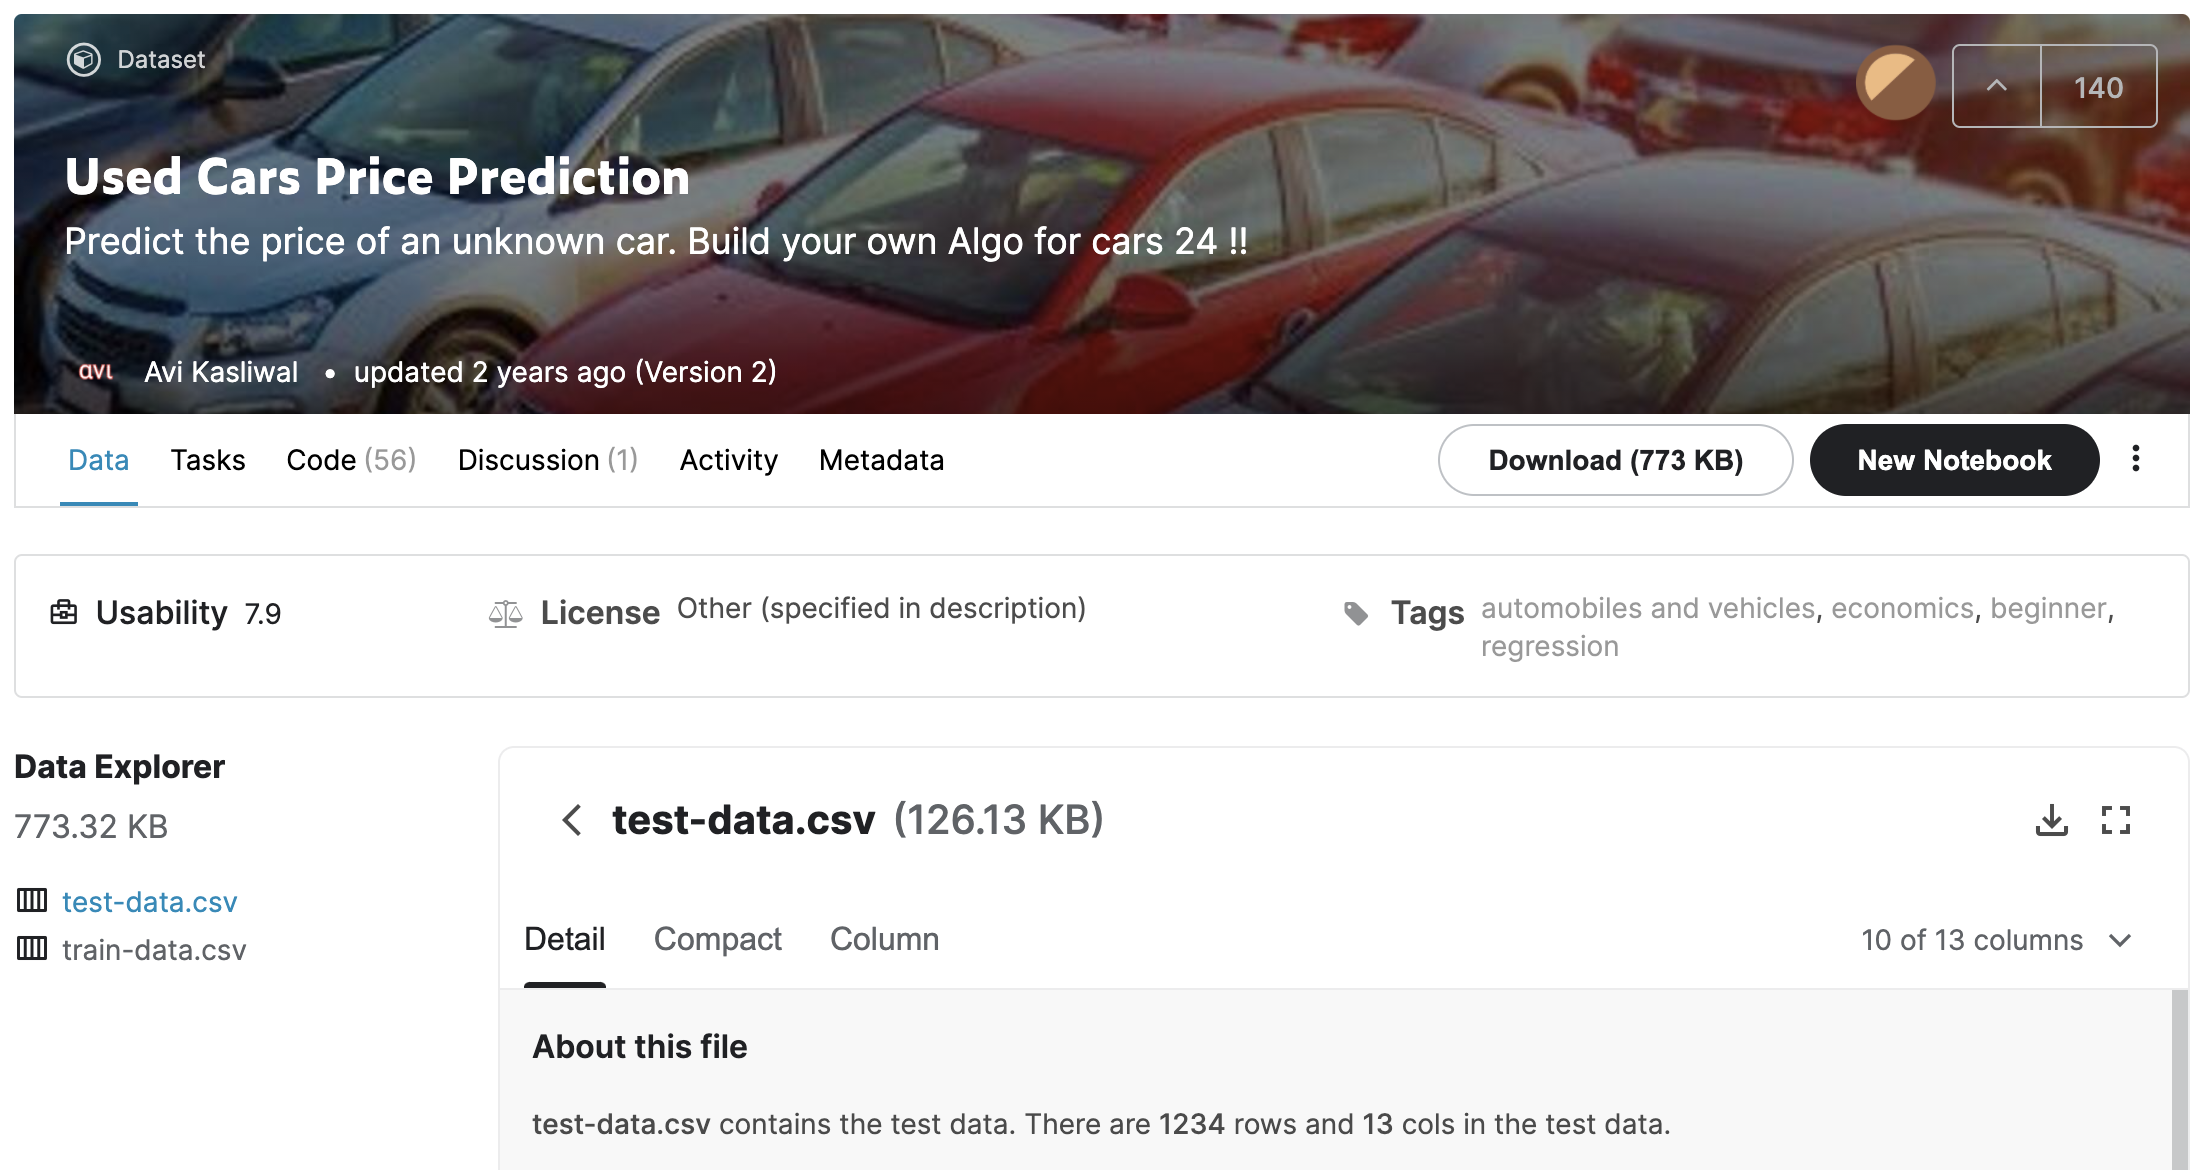

In [5]:
car_t = pd.read_csv('./train_data_r.csv')
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환

In [6]:
# Mileage null값 확인
car_t[car_t['Mileage'].isnull()]

Unnamed: 0                       Name Location  Year  Kilometers_Driven  \
4446        4446       Mahindra E Verito D4  Chennai  2016              50000   
4904        4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type Mileage   Engine   Power  Seats  \
4446  Electric    Automatic      First     NaN    72 CC  41 bhp      5   
4904  Electric    Automatic      First     NaN  1798 CC  73 bhp      5   

       New_Price  Price  
4446  13.58 Lakh  13.00  
4904         NaN  12.75

In [7]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])
car_t.reset_index(drop=True, inplace=True)

In [8]:
# 필요없는 컬럼 제거
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [10]:
get_split(car_t, 'Name', 'Brand')
get_split2(car_t, 'Name', 'Car_name')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')

Brand
Car_name
Mile
Eng
Pow


In [11]:
obj_col = ['Mile', 'Eng', 'Pow']
# 형변환
for i in obj_col:
    car_t[i] = car_t[i].astype(float)
    print(i)

Mile
Eng
Pow


In [12]:
car_t['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [13]:
# 중복되는 브랜드 제거
car_t['Brand'][car_t['Brand'] == 'ISUZU'] = 'Isuzu'

### 1) 브랜드

In [14]:
# 브랜드 분포 표
pd.DataFrame(car_t['Brand'].value_counts())

Brand
Maruti          1211
Hyundai         1107
Honda            608
Toyota           410
Mercedes-Benz    318
Volkswagen       315
Ford             300
Mahindra         271
BMW              267
Audi             236
Tata             186
Skoda            173
Renault          145
Chevrolet        121
Nissan            91
Land              60
Jaguar            40
Fiat              28
Mitsubishi        27
Mini              26
Volvo             21
Porsche           18
Jeep              15
Datsun            13
Isuzu              3
Force              3
Smart              1
Lamborghini        1
Bentley            1
Ambassador         1

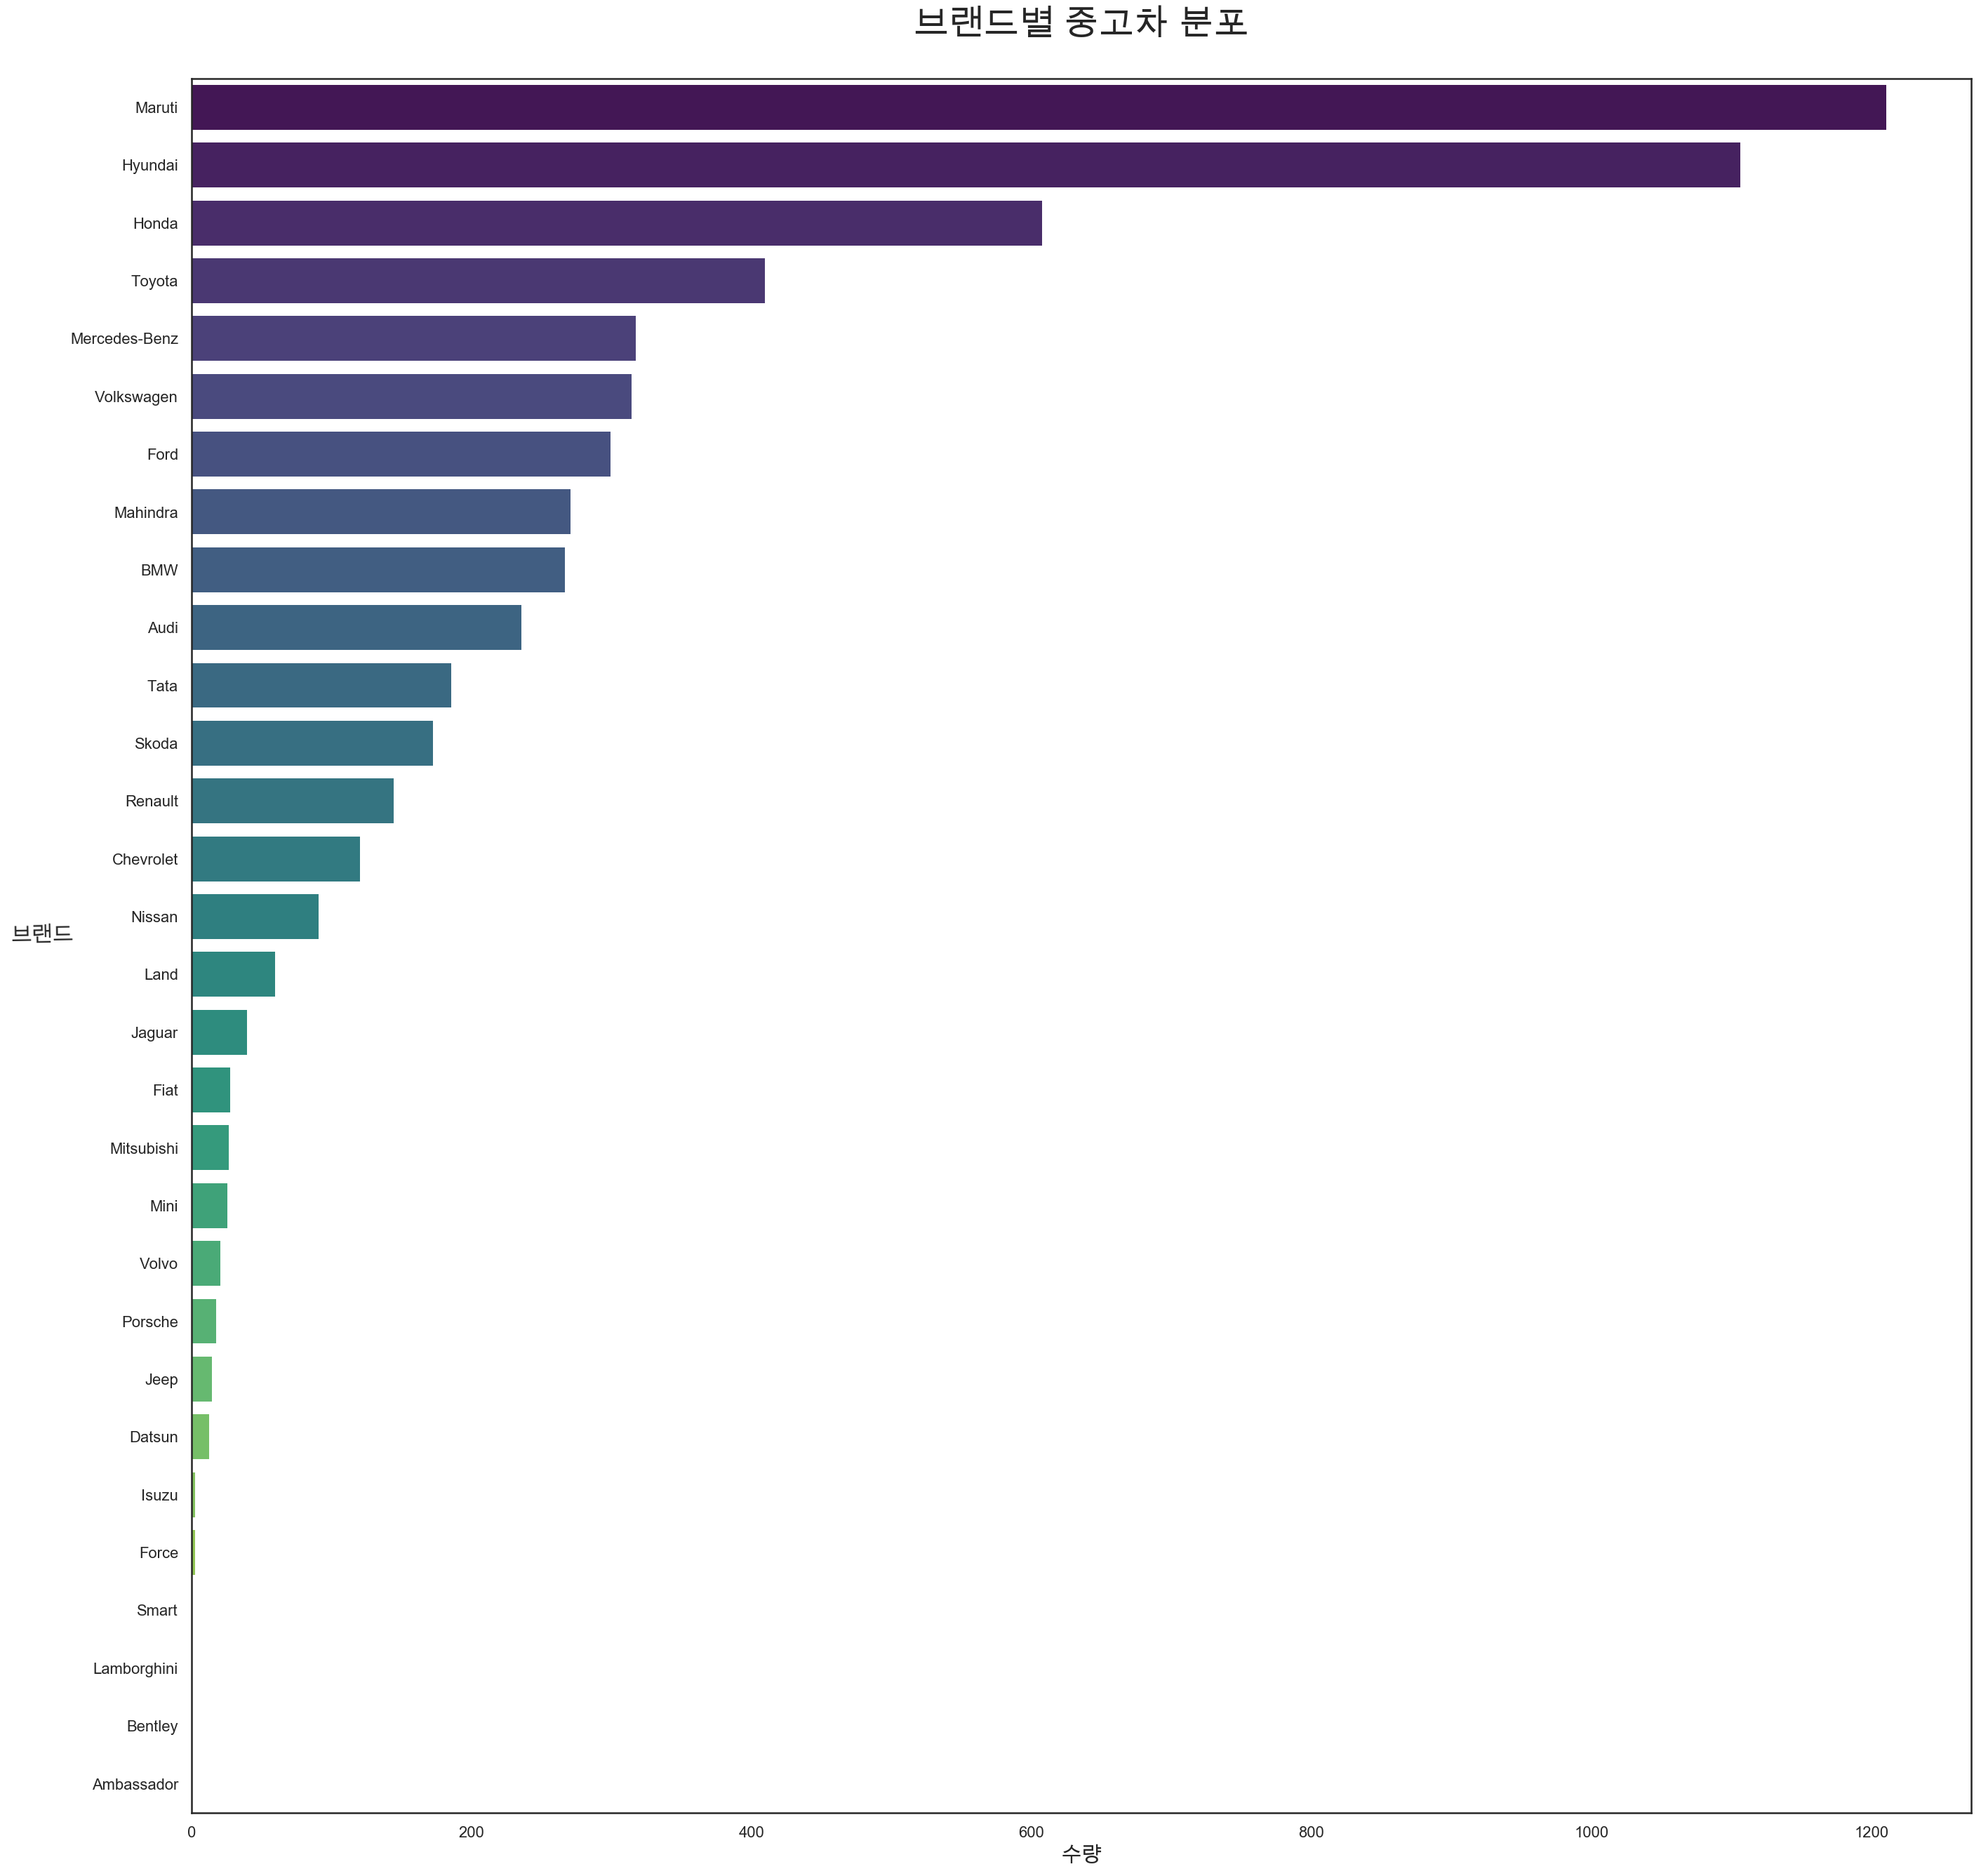

In [15]:
# 브랜드 분포 그래프
plt.figure(figsize=(50,50))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Brand'].value_counts()).T, palette='viridis', ci=False, orient='h')

plt.title('브랜드별 중고차 분포', fontsize=25, y=1.02)
plt.xlabel('수량', fontsize=15)
plt.ylabel('브랜드', fontsize=15, rotation=1, labelpad=20) 

plt.show()

### 2) 연도

In [16]:
# 연도별 분표 표
pd.DataFrame(car_t['Year'].value_counts()).sort_index(ascending=False)

Year
2019   102
2018   298
2017   587
2016   740
2015   744
2014   797
2013   649
2012   580
2011   465
2010   342
2009   198
2008   174
2007   125
2006    78
2005    57
2004    31
2003    17
2002    15
2001     8
2000     4
1999     2
1998     4

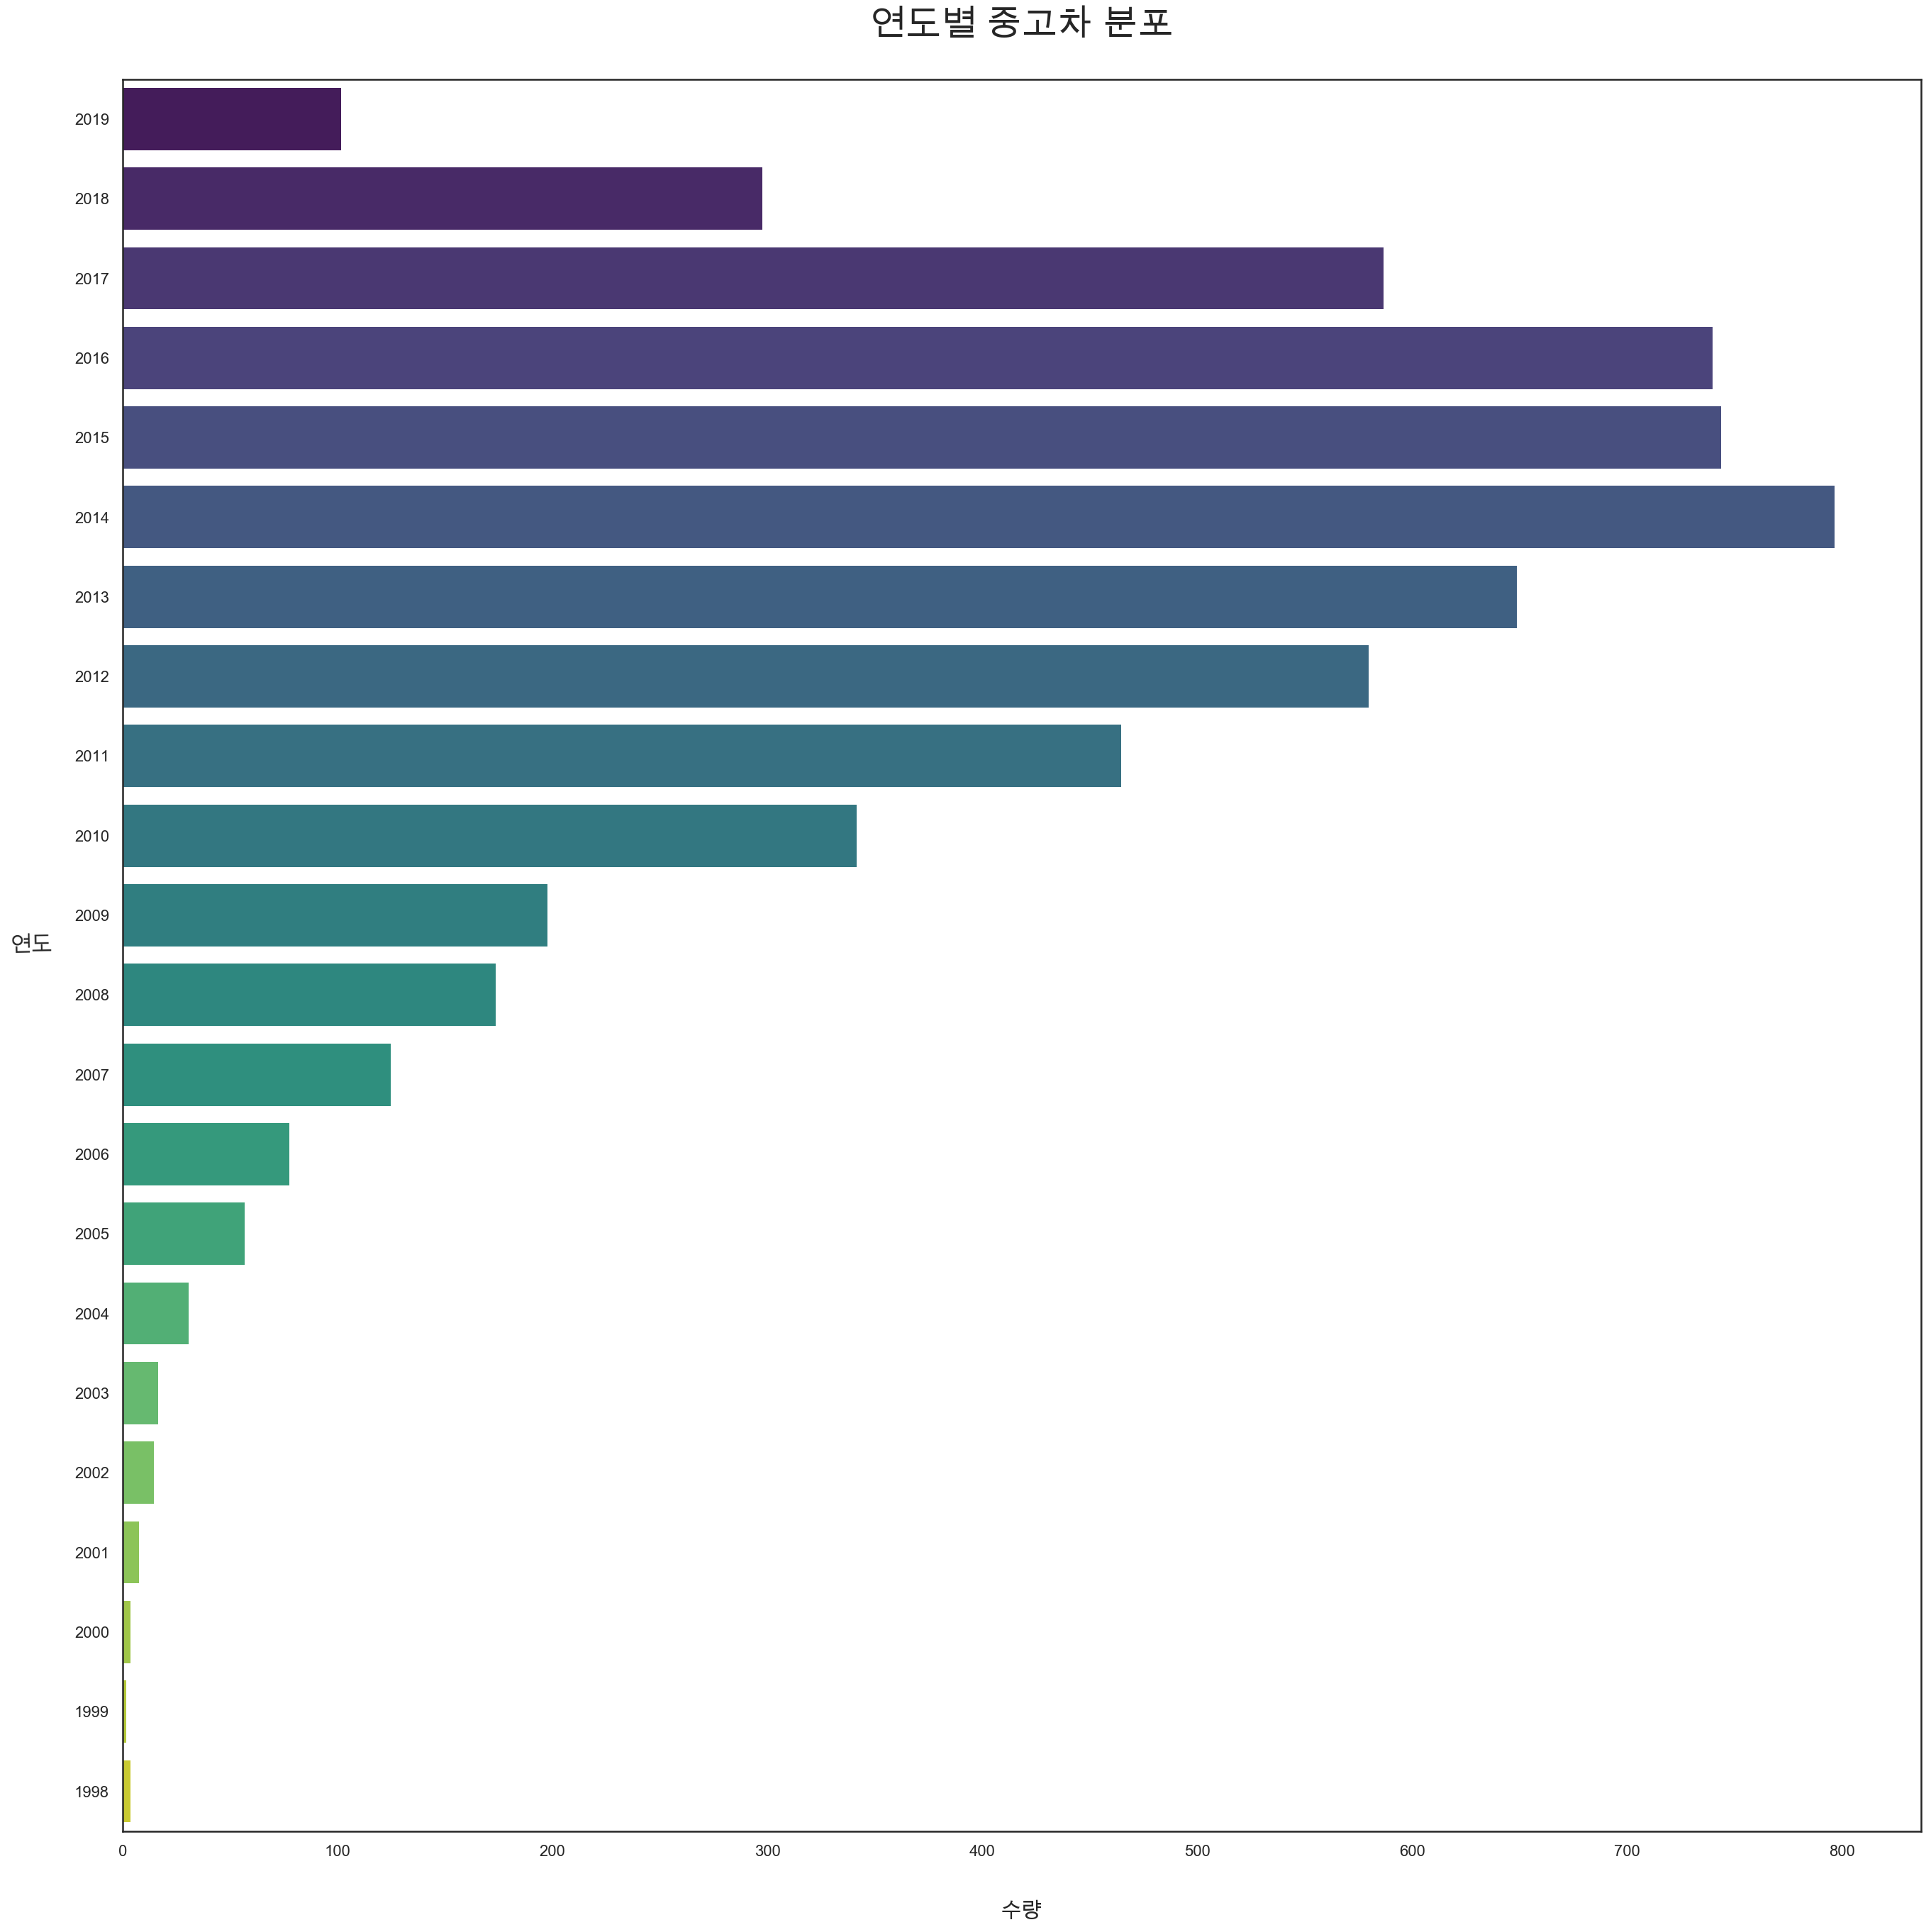

In [17]:
# 연도별 분포 그래프
plt.figure(figsize=(50,50))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Year'].value_counts()).sort_index(ascending=False).T, palette='viridis', ci=False, orient='h')

plt.title('연도별 중고차 분포', fontsize=25, y=1.02)
plt.xlabel('수량', fontsize=15, labelpad=30)
plt.ylabel('연도', fontsize=15, rotation=1, labelpad=30) 

plt.show()

### 3) 지역

In [18]:
# 지역별 분표 표
pd.DataFrame(car_t['Location'].value_counts()).sort_values(by='Location', ascending=False)

Location
Mumbai           789
Hyderabad        742
Kochi            651
Coimbatore       636
Pune             622
Delhi            554
Kolkata          535
Chennai          493
Jaipur           413
Bangalore        358
Ahmedabad        224

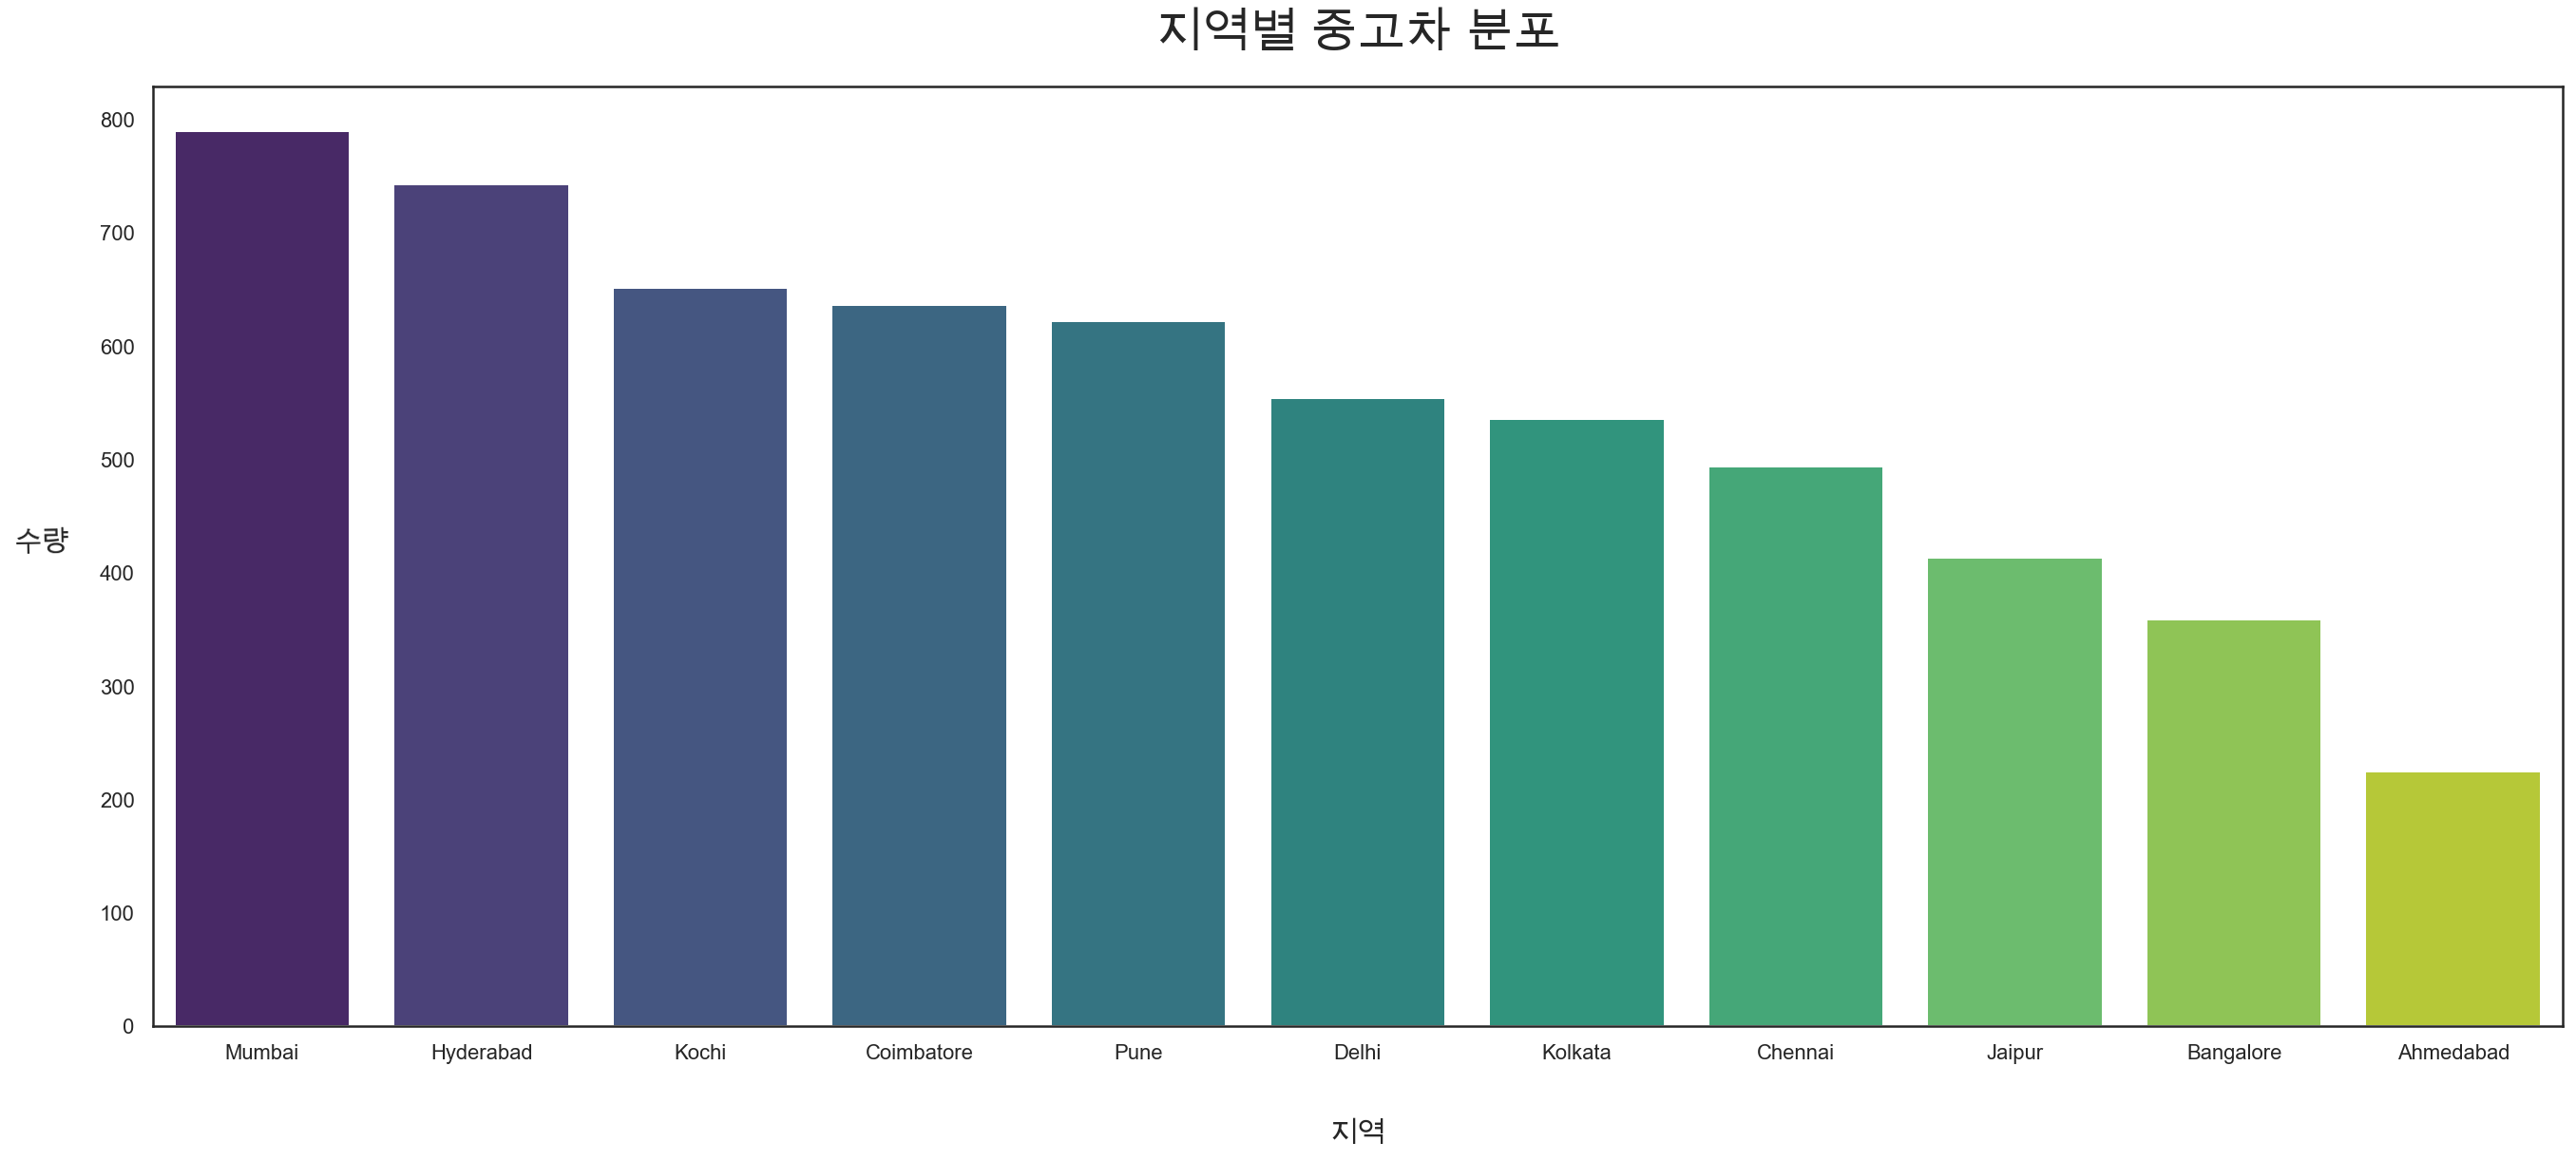

In [19]:
# 지역별 분포 그래프
plt.figure(figsize=(50,20))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Location'].value_counts()).sort_values(by='Location', ascending=False).T, palette='viridis', ci=False)

plt.title('지역별 중고차 분포', fontsize=25, y=1.03)
plt.xlabel('지역', fontsize=15, labelpad=30)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

plt.show()

### 4) 변속기

In [20]:
pd.DataFrame(car_t['Transmission'].value_counts()).sort_index(ascending=False)

Transmission
Manual             4299
Automatic          1718

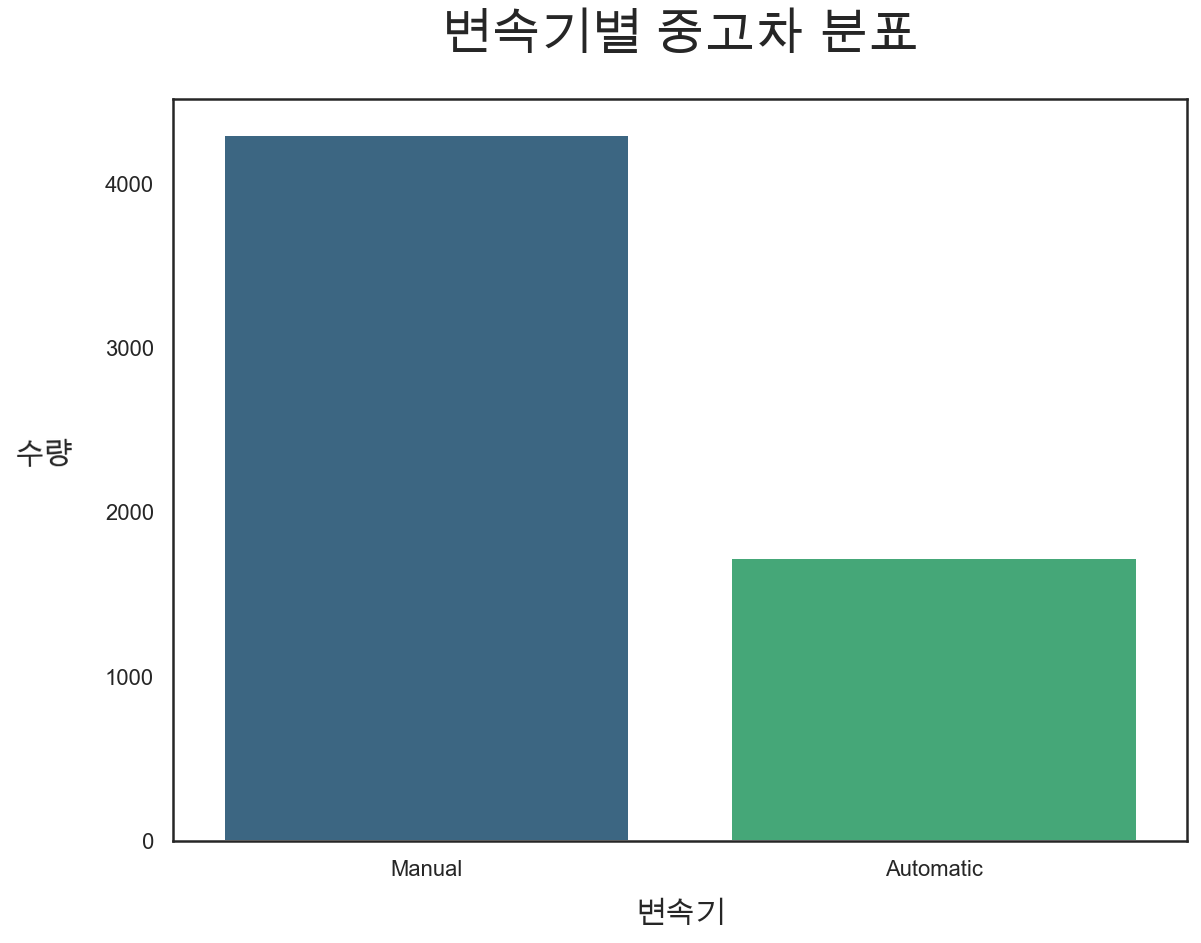

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Transmission'].value_counts()).sort_index(ascending=False).T, palette='viridis', ci=False)

plt.title('변속기별 중고차 분표', fontsize=25, y=1.05)
plt.xlabel('변속기', fontsize=15, labelpad=10)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

plt.show()

### 5) Owner_Type

In [22]:
pd.DataFrame(car_t['Owner_Type'].value_counts()).sort_values(by='Owner_Type', ascending=False)

Owner_Type
First                 4927
Second                 968
Third                  113
Fourth & Above           9

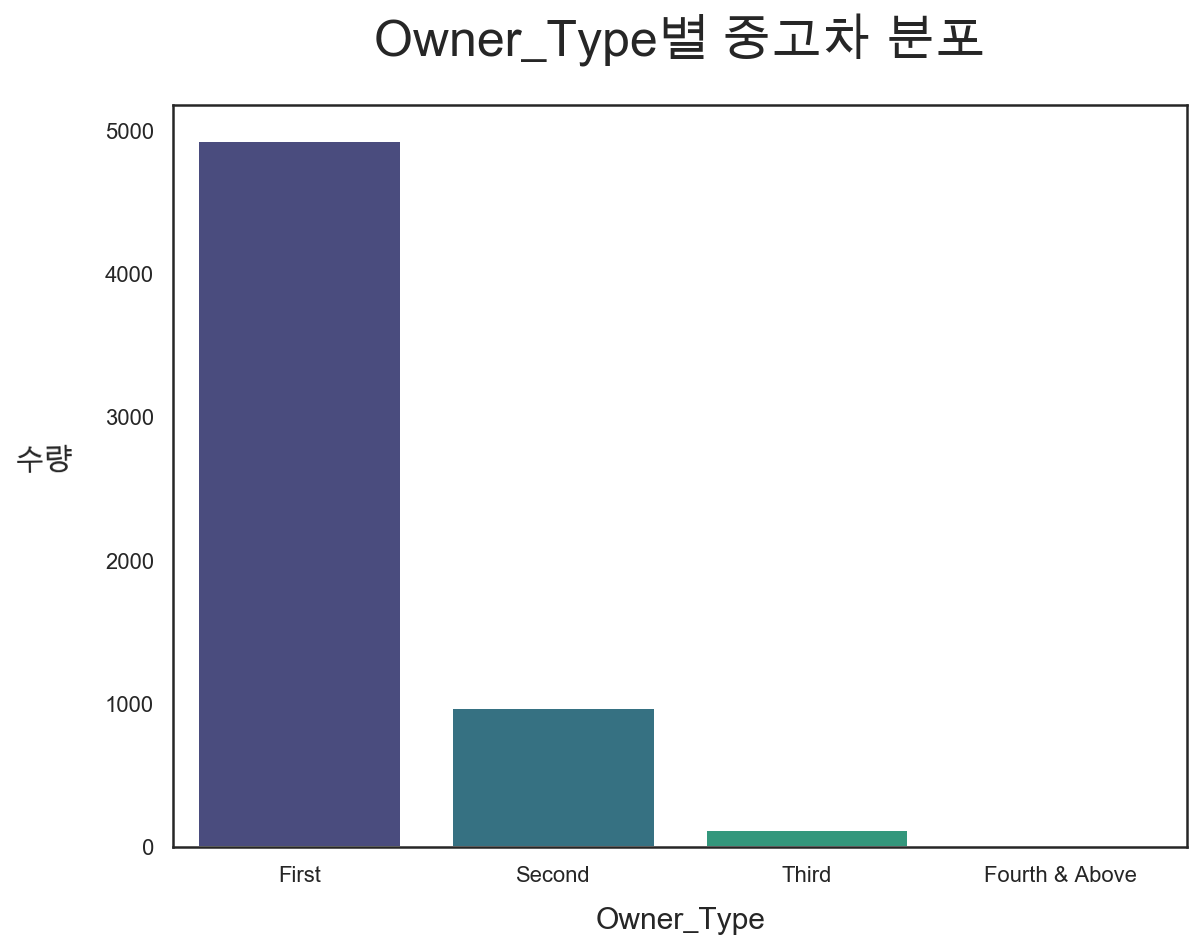

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Owner_Type'].value_counts()).sort_values(by='Owner_Type', ascending=False).T, palette='viridis', ci=False)

plt.title('Owner_Type별 중고차 분포', fontsize=25, y=1.05)
plt.xlabel('Owner_Type', fontsize=15, labelpad=10)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

plt.show()

### 6) 연료

In [24]:
# 연료 분포 표
pd.DataFrame(car_t['Fuel_Type'].value_counts())

Fuel_Type
Diesel       3205
Petrol       2746
CNG            56
LPG            10

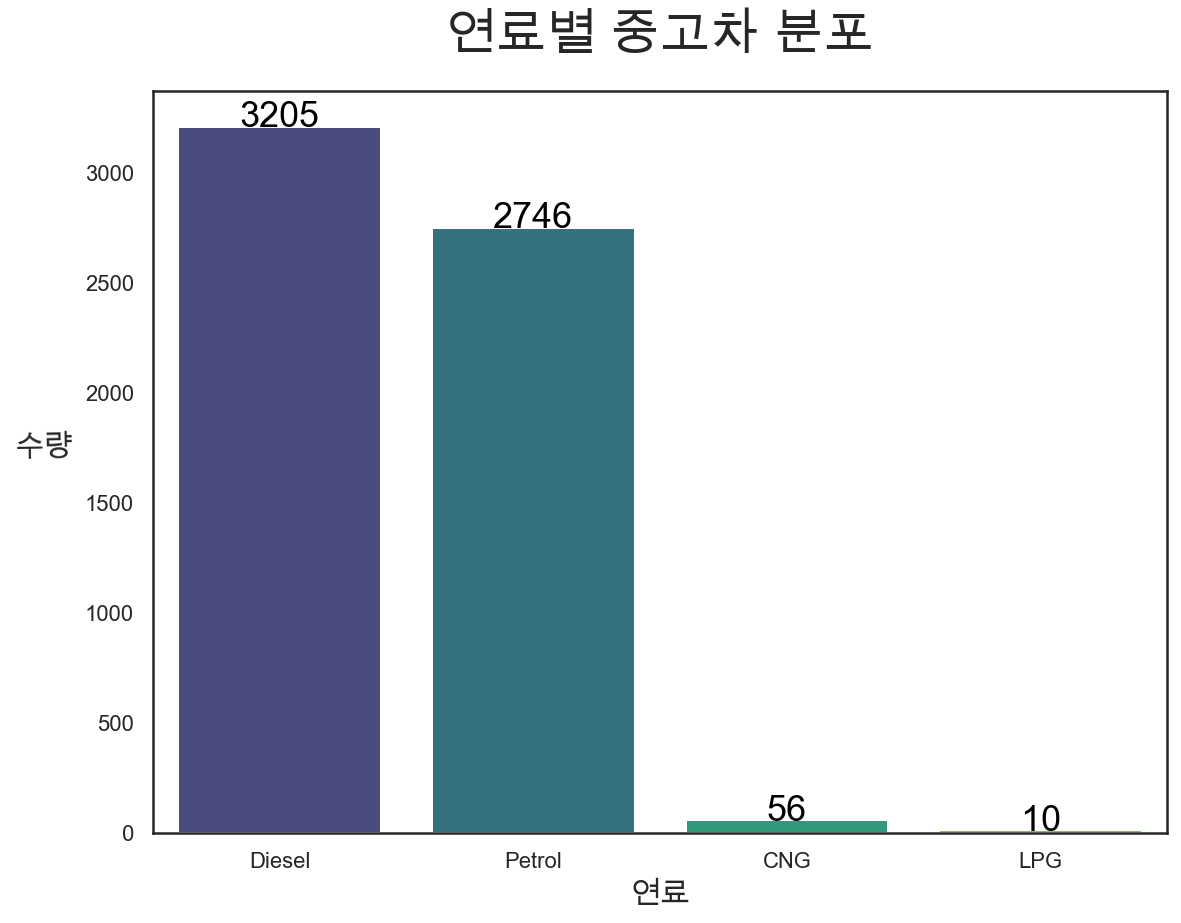

In [25]:
# 연료 분포 그래프
plt.figure(figsize=(20,15))
plt.subplot(221)

g = sns.barplot(data=pd.DataFrame(car_t['Fuel_Type'].value_counts()).T, palette='viridis', ci=False)

plt.title('연료별 중고차 분포', fontsize=25, y=1.04)
plt.xlabel('연료', fontsize=15)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=20)

for i in range(0,4):
    g.text(i,car_t['Fuel_Type'].value_counts()[i], car_t['Fuel_Type'].value_counts()[i], 
    color= 'black', ha='center', fontsize=18)

plt.show()

In [26]:
# 각 Fuel_type을 km/L로 계산
car_t['Mile'][car_t['Fuel_Type'] == 'CNG']= car_t[car_t['Fuel_Type'] == 'CNG']['Mile']*1.64
car_t['Mile'][car_t['Fuel_Type'] == 'LPG']= car_t[car_t['Fuel_Type'] == 'LPG']['Mile']*1.3

In [27]:
# dummy 생성
dummy_col = ['Brand', 'Fuel_Type', 'Transmission']

for i in dummy_col:
    dummy = pd.get_dummies(car_t[i])
    car_t = pd.concat([car_t, dummy], axis=1)
    print(i)

Brand
Fuel_Type
Transmission


In [28]:
# Owner를 1234로 변환
car_t['Owner'] = range(0,len(car_t))

for i in range(0,len(car_t)):
    if car_t['Owner_Type'][i] == 'First':
        car_t['Owner'][i] = 1

    elif car_t['Owner_Type'][i] == 'Second':
        car_t['Owner'][i] = 2

    elif car_t['Owner_Type'][i] == 'Third':
        car_t['Owner'][i] = 3

    elif car_t['Owner_Type'][i] == 'Fourth & Above':
        car_t['Owner'][i] = 4

In [29]:
# dummy 생성후 중복 컬럼 제거
car_t.drop(['Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'], axis=1, inplace=True)

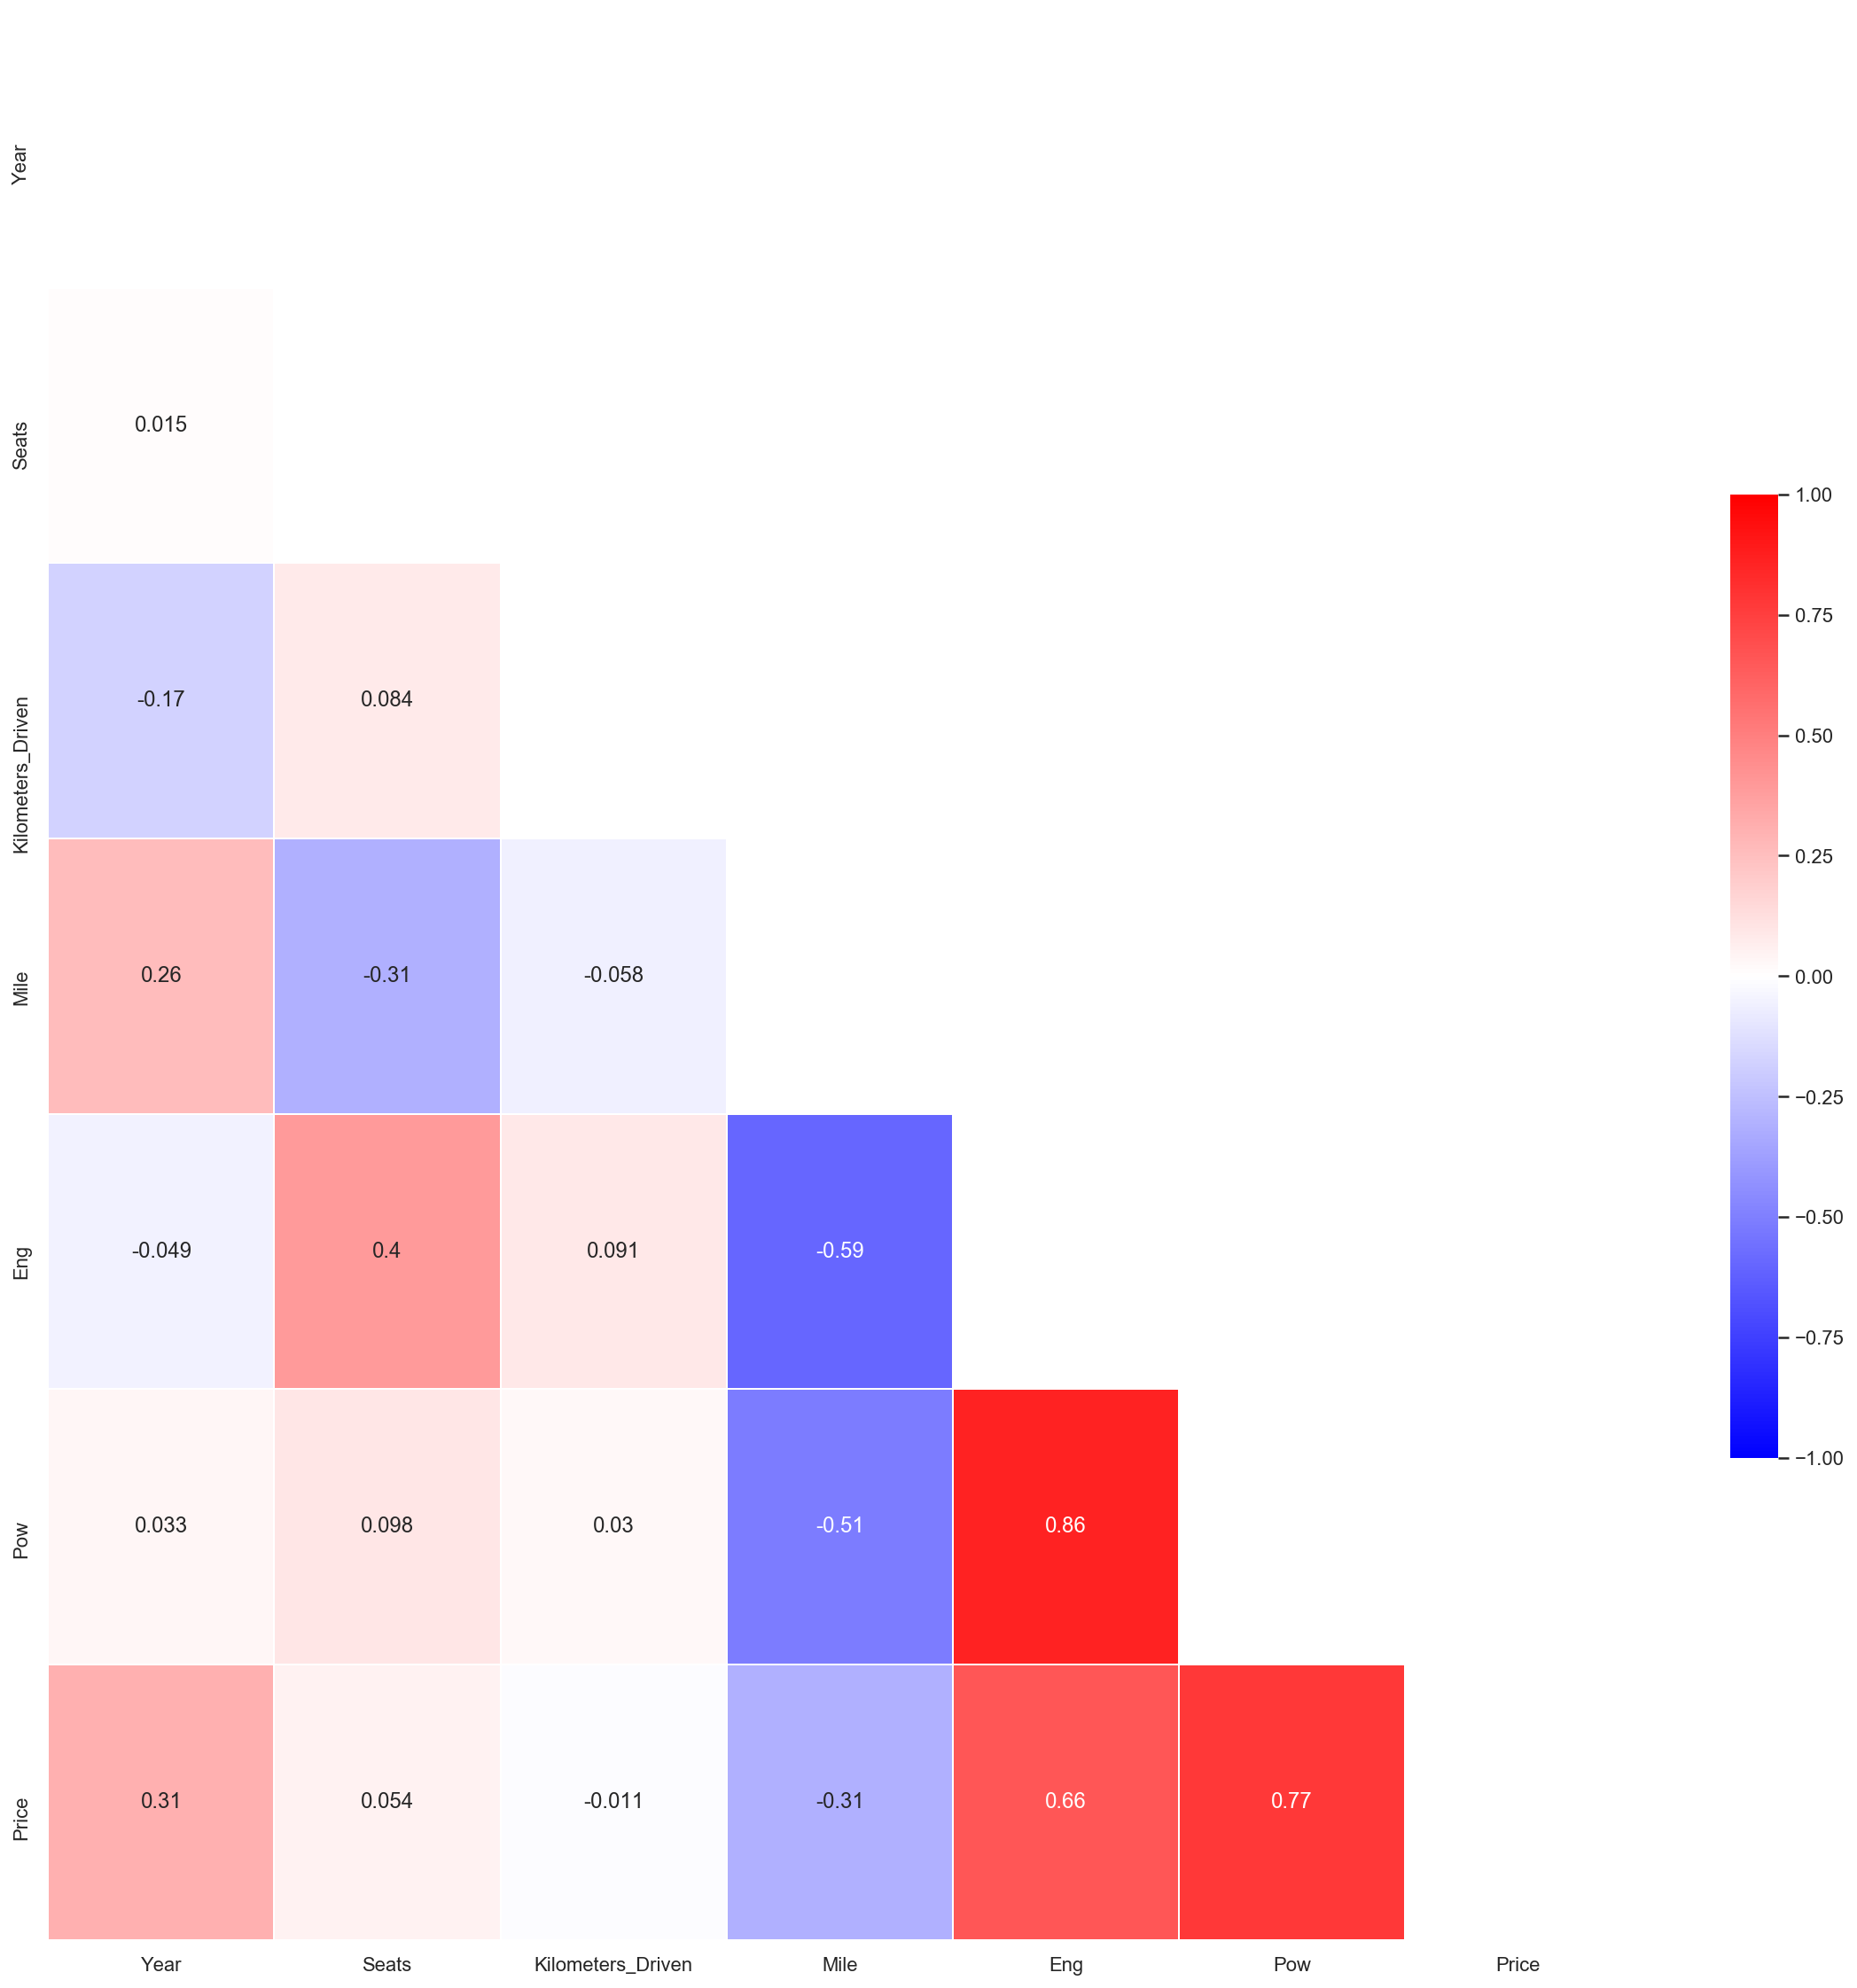

In [30]:
# 주요 변수들로 히트맵
df = car_t[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()

fig, ax = plt.subplots( figsize=(20,20) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

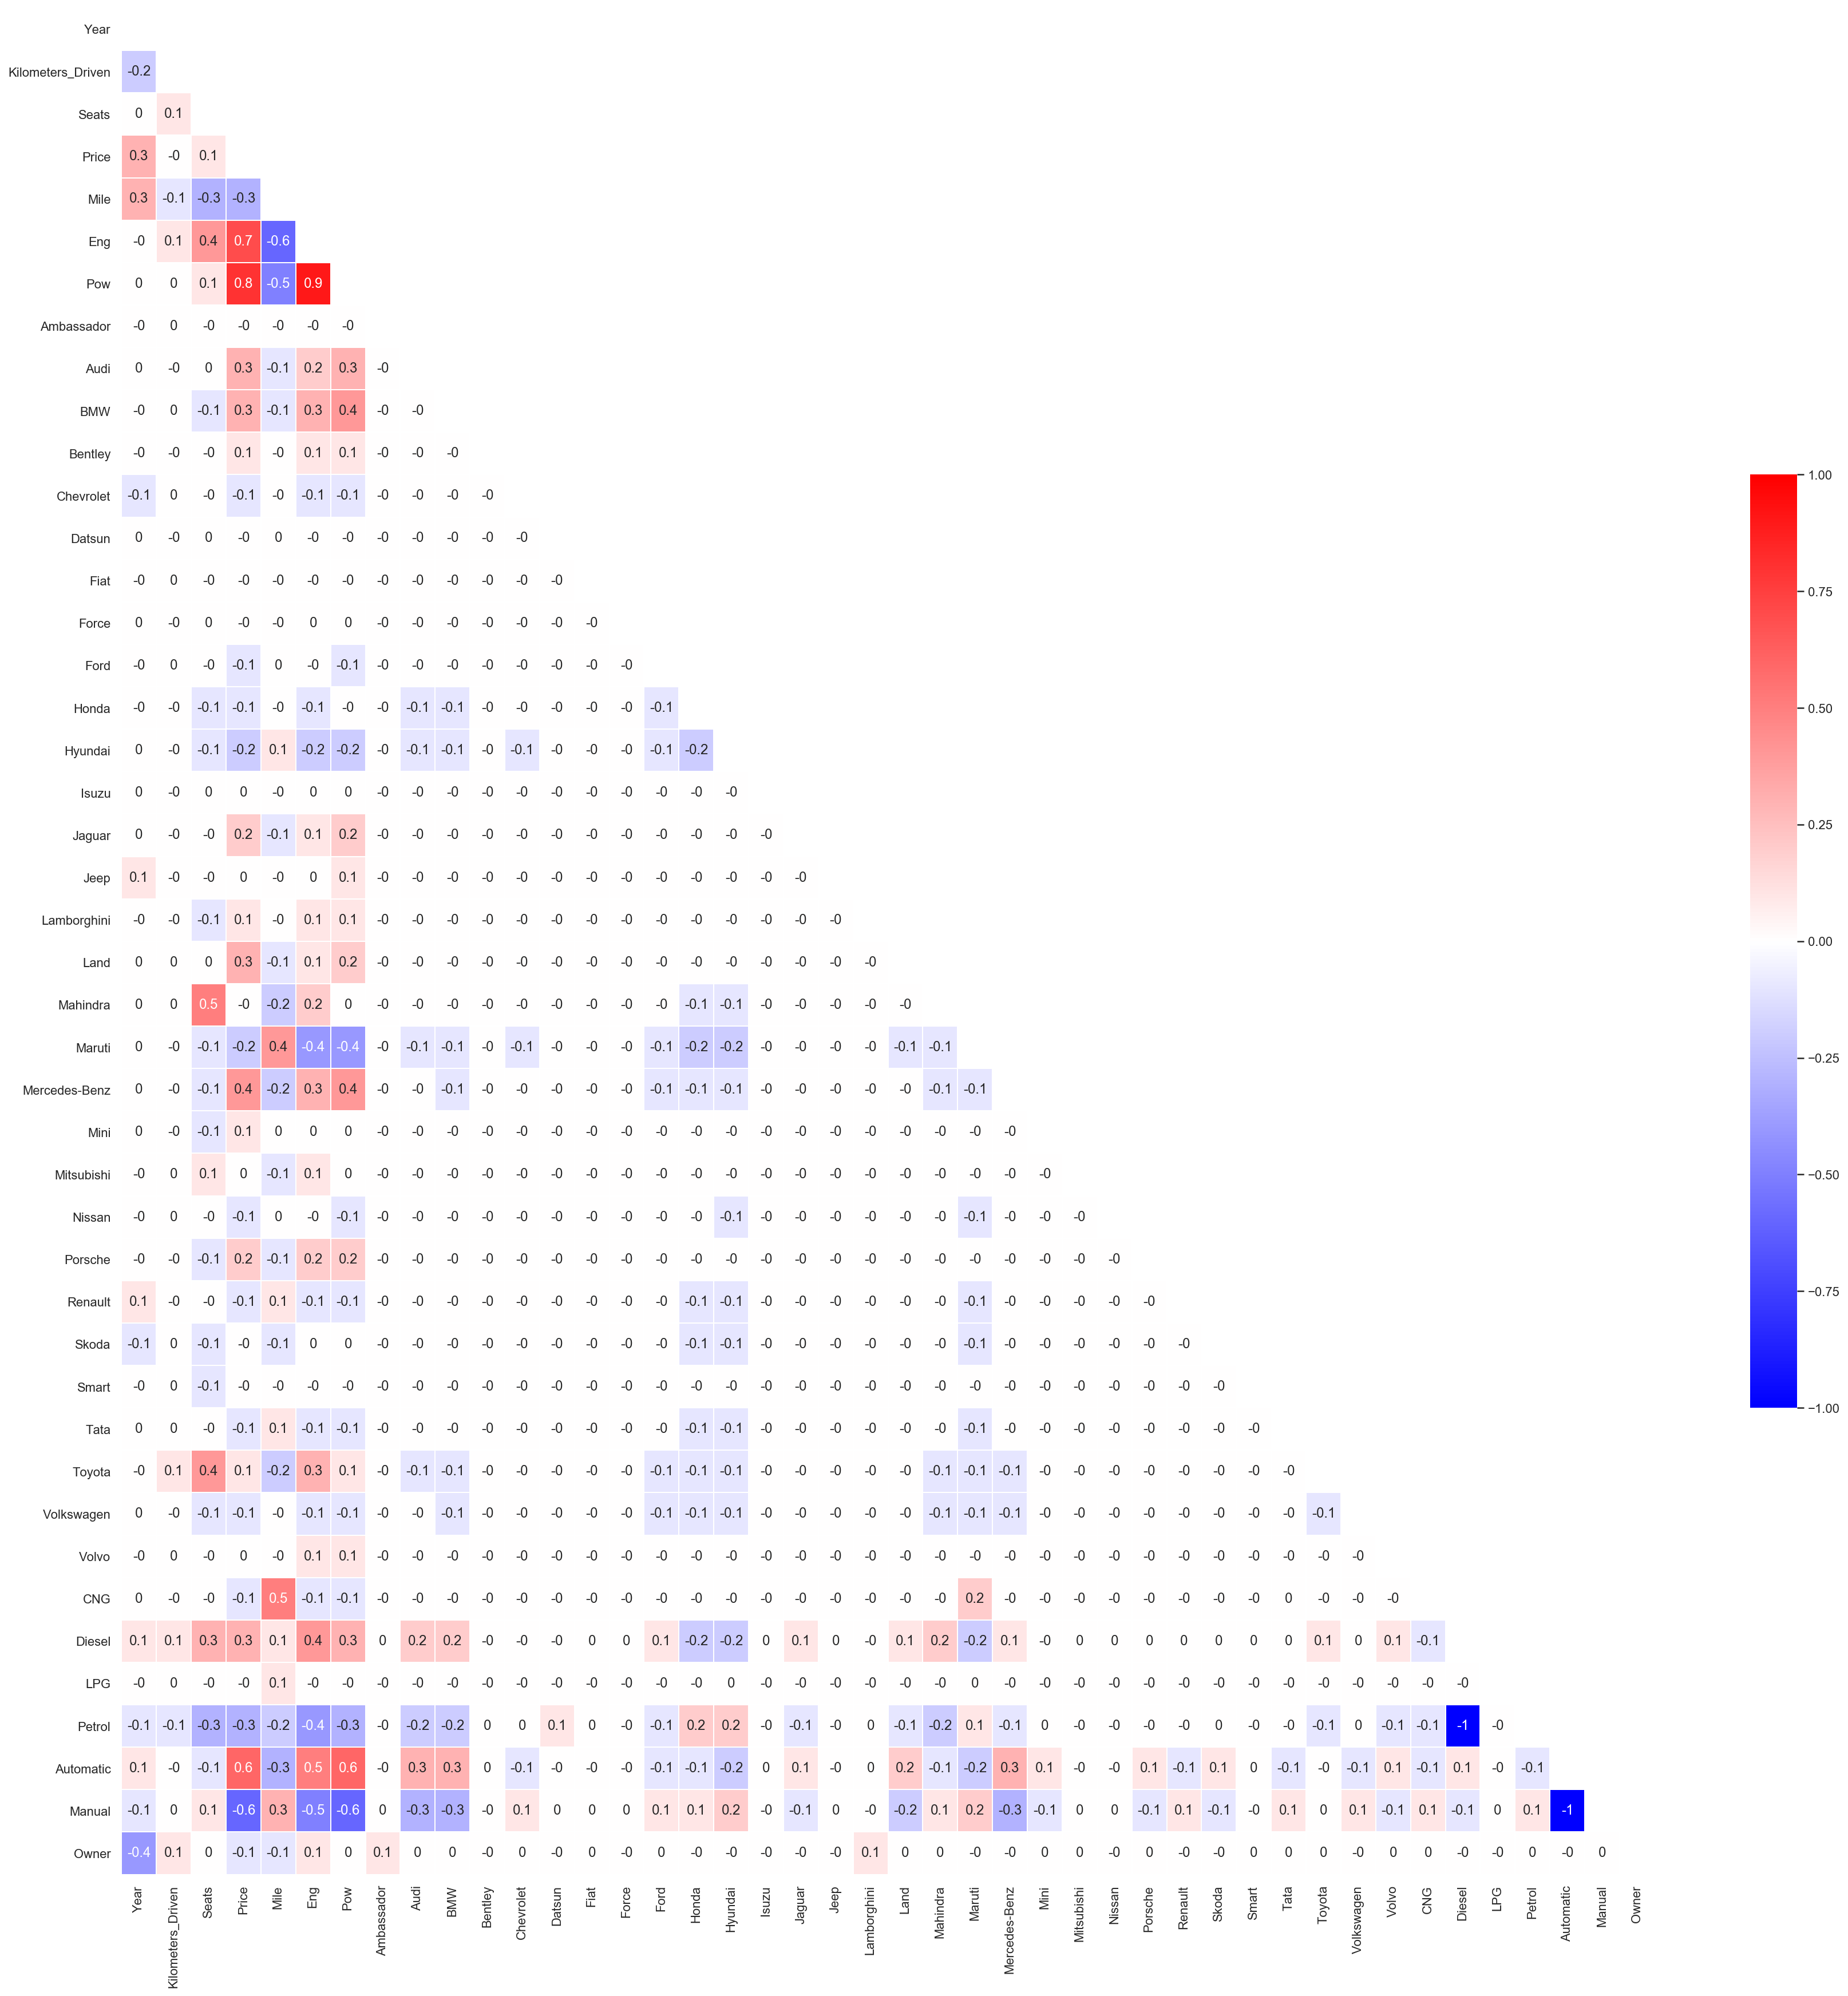

In [31]:
# 모든 컬럼을 변수로 히트맵
df = car_t.corr().round(1)

fig, ax = plt.subplots( figsize=(30,30) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

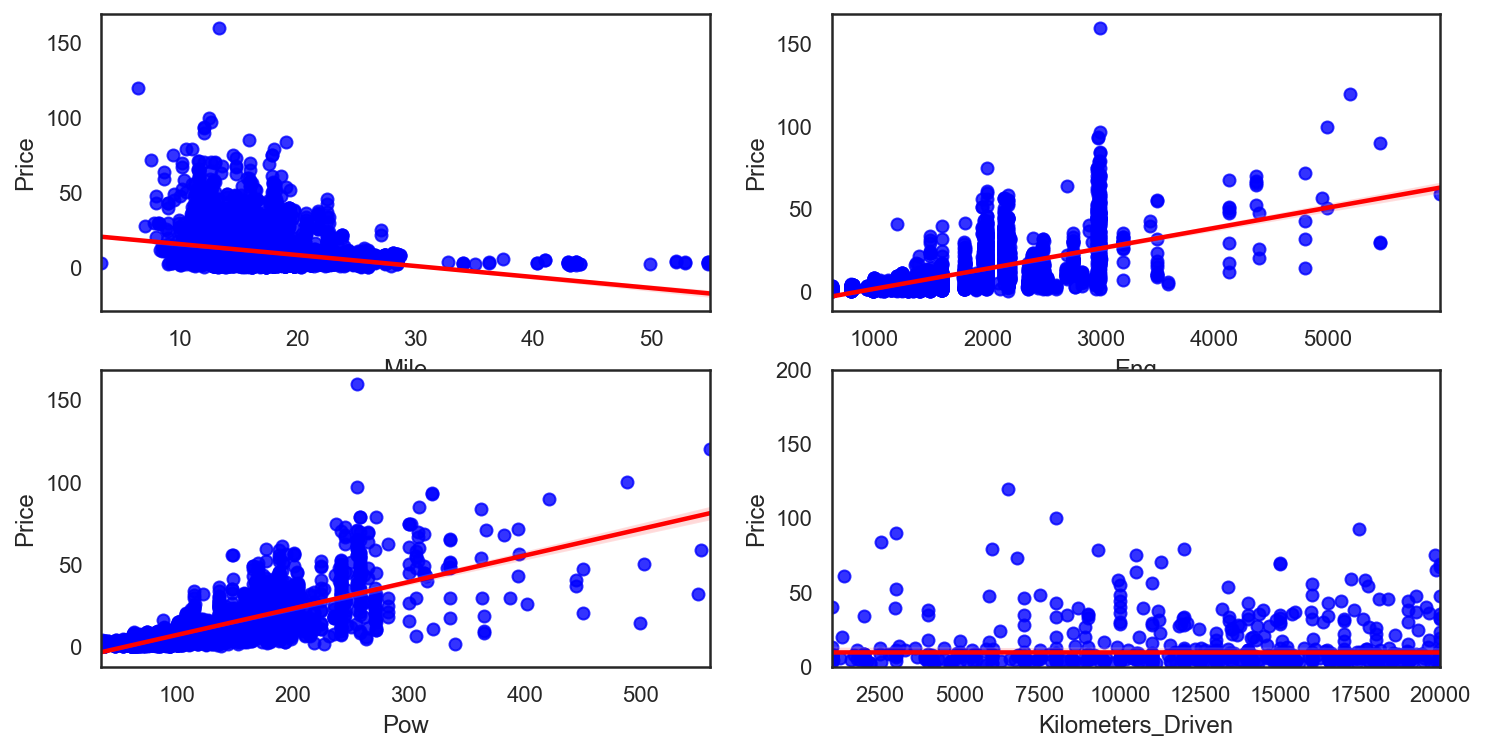

In [32]:
# 주요변수로 regplot
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="Kilometers_Driven", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.axis([1000, 20000, 0, 200])
plt.show()

In [33]:
# new_price가 있는 데이터 전처리

car_td = car_t.dropna()

car_td.reset_index(drop=True, inplace=True)

get_split(car_td, 'New_Price', 'new_price')

car_td['new_price'] = car_td['new_price'].astype(float)

new_price


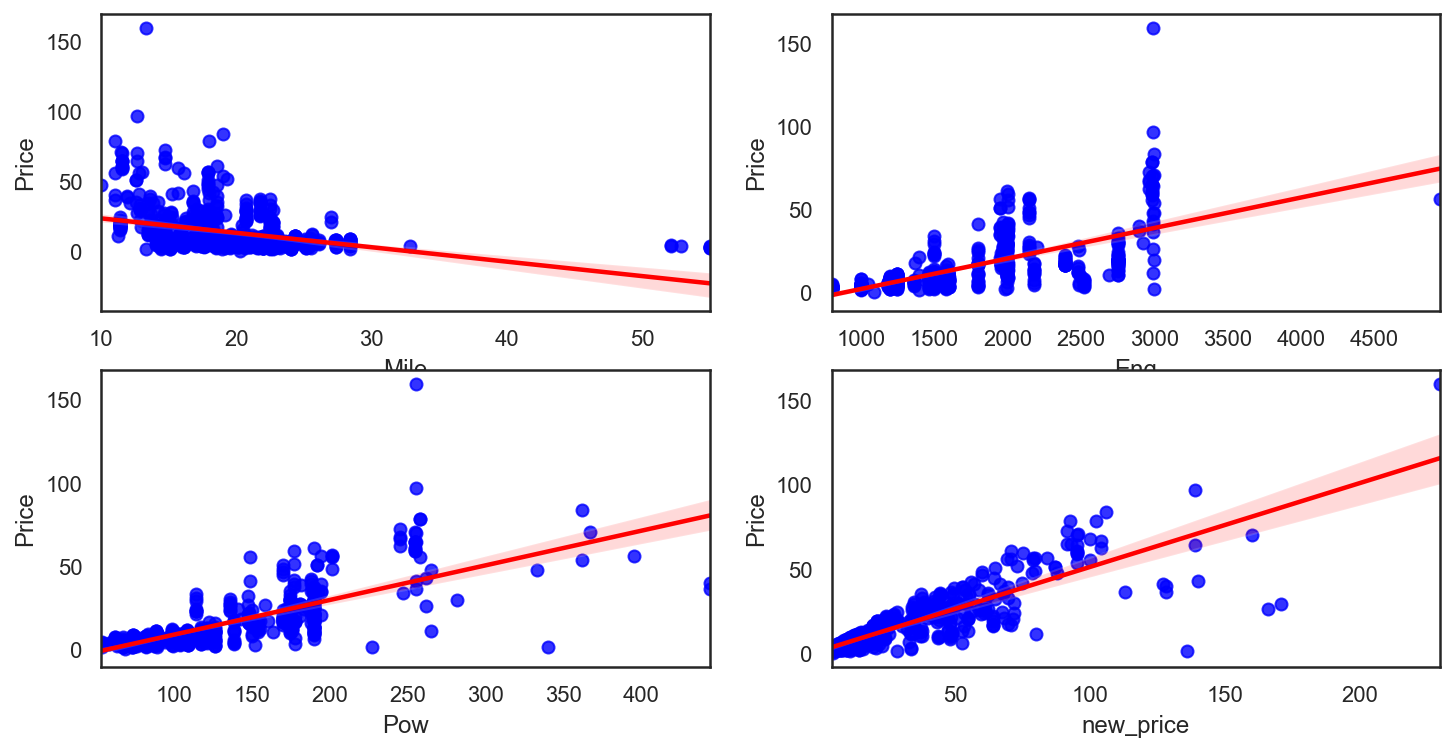

In [34]:
# new_price가 있는 데이터 regplot

plt.figure(figsize=(12,6))
plt.axis([50, 500, 0, 200])

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="new_price", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

## 모델 및 데이터 탐색

In [35]:
# linear 모델 결과 확인
def get_results(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
    print('r2_score: {}'.format(r2_score(pred_test, y_test)))

## 1. new_price가 있는 데이터 823개

In [36]:
# new_price가 있는 데이터 823개, 컬럼 51개

x = car_td.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_td['Price']

get_results(x, y)

explained_variance_score: 0.7273686034338473
mean_squared_errors: 46.35748393233807
r2_score: 0.7256936237219112


## 2. new_price 컬럼 제거, 6017개

In [37]:
# new_price를 drop한 6017개, 컬럼 50개

x = car_t.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_t['Price']

get_results(x, y)

explained_variance_score: 0.6851230586401141
mean_squared_errors: 29.775041814681938
r2_score: 0.6840608572493682


## 3. raw 데이터, new_price가 있는 데이터 823개

In [38]:
# raw 데이터, new_price notnull값 823개, 컬럼 14개
# 전처리
car_tr.dropna(inplace=True)
car_tr.reset_index(drop=True, inplace=True)

get_split(car_tr, 'Mileage', 'Mile')
get_split(car_tr, 'Engine', 'Eng')
get_split(car_tr, 'Power', 'Pow')
get_split(car_tr, 'New_Price', 'new_price')

Mile
Eng
Pow
new_price


In [39]:
# raw 데이터, new_price notnull값 823개, 컬럼 14개

x = car_tr.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','New_Price',
                 'Owner_Type','Mileage','Engine','Power','Price'], axis=1)
y = car_tr['Price']

get_results(x, y)

explained_variance_score: 0.6518194945588607
mean_squared_errors: 62.23183504708037
r2_score: 0.6436665111804925


## 4. 지역 dummy

In [40]:
dummy = pd.get_dummies(car_t['Location'])
car_t_l = pd.concat([car_t, dummy], axis=1)

In [41]:
x = car_t_l.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.7042040951111259
mean_squared_errors: 28.575435941607154
r2_score: 0.702808708297503


## 5. 컬럼끼리 상관관계가 높은 컬럼 제거

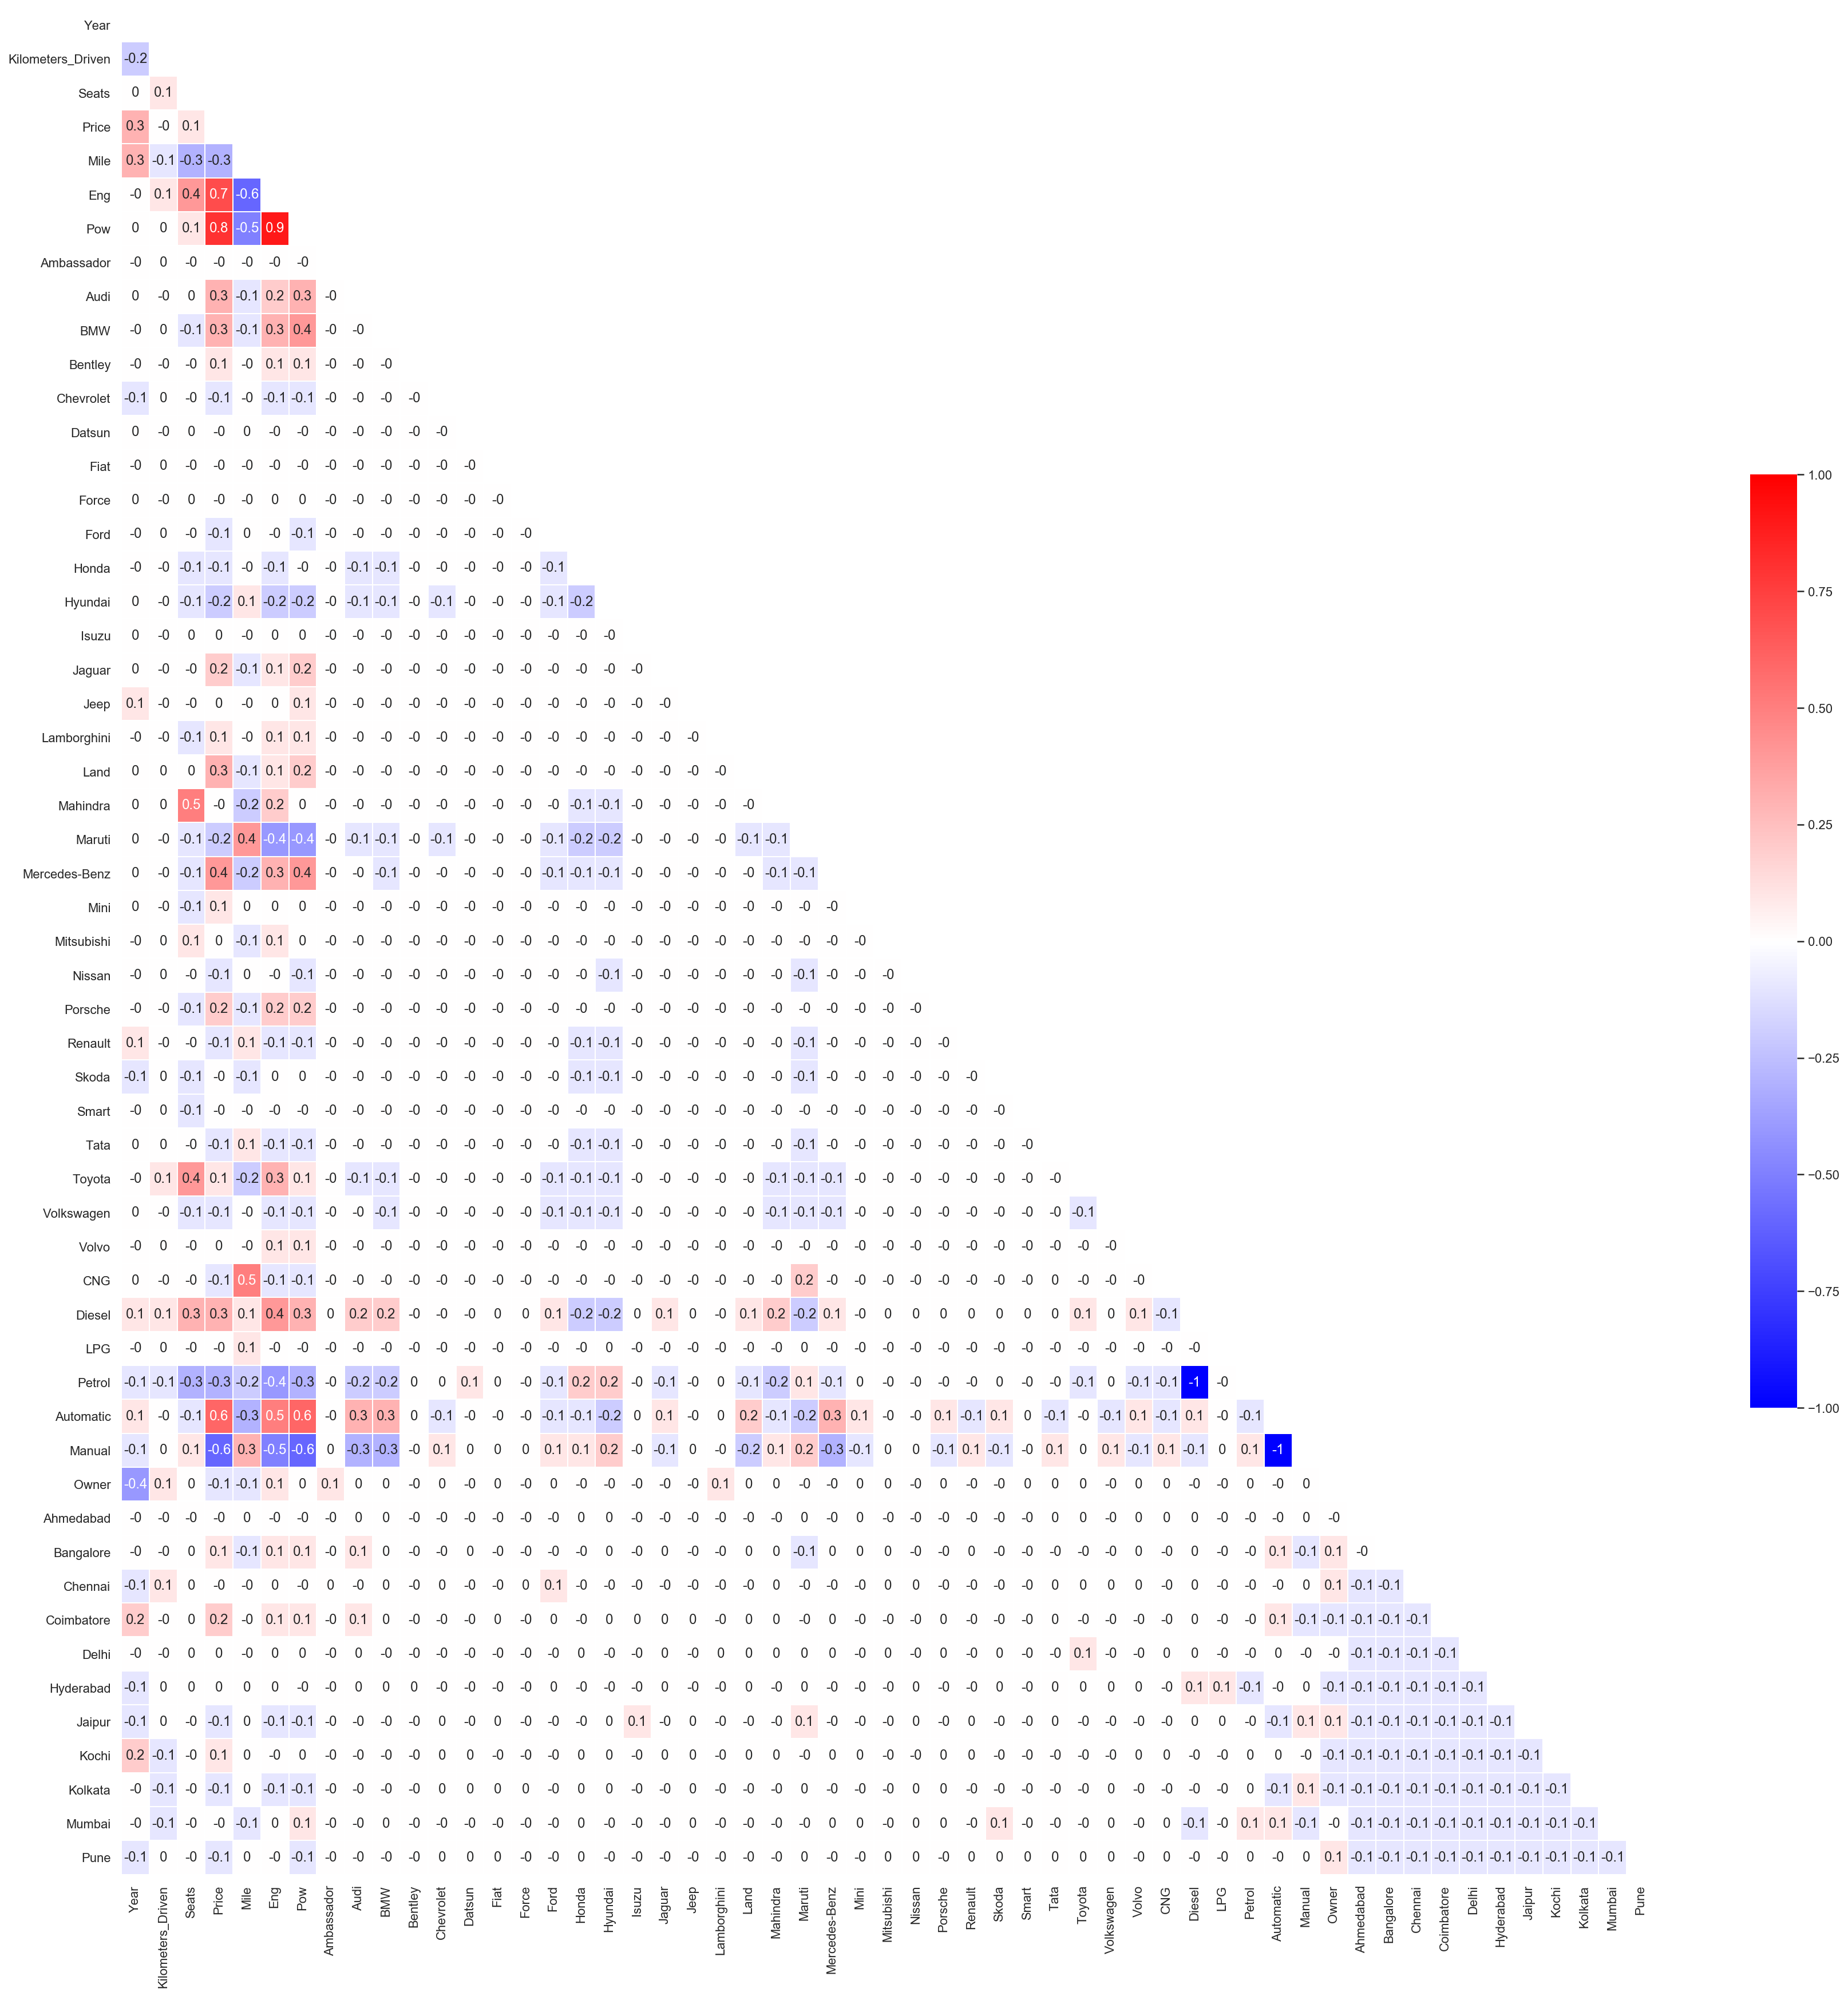

In [42]:
df = car_t_l.corr().round(1)

fig, ax = plt.subplots( figsize=(30,30) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

In [43]:
# 엔진 빼는것이 더 성능을 높임
x = car_t_l.drop(['Name','Location','New_Price','Brand','Car_name','Price','Eng'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.7069171710901084
mean_squared_errors: 28.345742980595126
r2_score: 0.7056570405919271


In [44]:
x = car_t_l.drop(['Name','Location','New_Price','Brand','Car_name','Price','Pow'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.665638981956897
mean_squared_errors: 31.720053720031657
r2_score: 0.6640995942256742


## 6. 이상치 제거

In [45]:
car_t_l.head(1)

Name Location  Year  Kilometers_Driven  Seats New_Price  \
0  Maruti Wagon R LXI CNG   Mumbai  2010              72000      5       NaN   

   Price   Brand         Car_name    Mile    Eng    Pow  Ambassador  Audi  \
0   1.75  Maruti  Wagon R LXI CNG  43.624  998.0  58.16           0     0   

   BMW  Bentley  Chevrolet  Datsun  Fiat  Force  Ford  Honda  Hyundai  Isuzu  \
0    0        0          0       0     0      0     0      0        0      0   

   Jaguar  Jeep  Lamborghini  Land  Mahindra  Maruti  Mercedes-Benz  Mini  \
0       0     0            0     0         0       1              0     0   

   Mitsubishi  Nissan  Porsche  Renault  Skoda  Smart  Tata  Toyota  \
0           0       0        0        0      0      0     0       0   

   Volkswagen  Volvo  CNG  Diesel  LPG  Petrol  Automatic  Manual  Owner  \
0           0      0    1       0    0       0          0       1      1   

   Ahmedabad  Bangalore  Chennai  Coimbatore  Delhi  Hyderabad  Jaipur  Kochi  \
0          0          0        0           0      0          0       0      0   

   Kolkata  Mumbai  Pune  
0        0       1     0

In [46]:
car_t_l.sort_values(by='Kilometers_Driven', ascending=False).head(10)

Name   Location  Year  \
2328                        BMW X5 xDrive 30d M Sport    Chennai  2017   
340            Skoda Octavia Ambition Plus 2.0 TDI AT    Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline    Chennai  2013   
358                             Hyundai i10 Magna 1.2    Chennai  2009   
3092                             Honda City i VTEC SV    Kolkata  2015   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT    Chennai  2015   
4490                   Hyundai i20 Magna Optional 1.2  Bangalore  2013   
3649                                   Tata Indigo LS     Jaipur  2008   
1528      Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  Hyderabad  2005   
1975                          Skoda Superb 1.8 TSI MT       Pune  2012   

      Kilometers_Driven  Seats New_Price  Price       Brand  \
2328            6500000      5       NaN  65.00         BMW   
340              775000      5       NaN   7.50       Skoda   
1860             720000      5       NaN   5.90  Volkswagen   
358              620000      5       NaN   2.70     Hyundai   
3092             480000      5       NaN   5.00       Honda   
2823             480000      5       NaN  13.00  Volkswagen   
4490             445000      5       NaN   4.45     Hyundai   
3649             300000      5       NaN   1.00        Tata   
1528             299322      8       NaN   4.00      Toyota   
1975             282000      5       NaN   3.30       Skoda   

                                  Car_name   Mile     Eng     Pow  Ambassador  \
2328                 X5 xDrive 30d M Sport  15.97  2993.0  258.00           0   
340       Octavia Ambition Plus 2.0 TDI AT  19.30  1968.0  141.00           0   
1860                 Vento Diesel Highline  20.54  1598.0  103.60           0   
358                          i10 Magna 1.2  20.36  1197.0   78.90           0   
3092                        City i VTEC SV  17.40  1497.0  117.30           0   
2823  Jetta 2013-2015 2.0L TDI Highline AT  16.96  1968.0  138.03           0   
4490                i20 Magna Optional 1.2  18.50  1197.0   82.90           0   
3649                             Indigo LS  17.00  1405.0   70.00           0   
1528  Innova 2.5 G (Diesel) 8 Seater BS IV  12.80  2494.0  102.00           0   
1975                     Superb 1.8 TSI MT  13.14  1798.0  160.00           0   

      Audi  BMW  Bentley  Chevrolet  Datsun  Fiat  Force  Ford  Honda  \
2328     0    1        0          0       0     0      0     0      0   
340      0    0        0          0       0     0      0     0      0   
1860     0    0        0          0       0     0      0     0      0   
358      0    0        0          0       0     0      0     0      0   
3092     0    0        0          0       0     0      0     0      1   
2823     0    0        0          0       0     0      0     0      0   
4490     0    0        0          0       0     0      0     0      0   
3649     0    0        0          0       0     0      0     0      0   
1528     0    0        0          0       0     0      0     0      0   
1975     0    0        0          0       0     0      0     0      0   

      Hyundai  Isuzu  Jaguar  Jeep  Lamborghini  Land  Mahindra  Maruti  \
2328        0      0       0     0            0     0         0       0   
340         0      0       0     0            0     0         0       0   
1860        0      0       0     0            0     0         0       0   
358         1      0       0     0            0     0         0       0   
3092        0      0       0     0            0     0         0       0   
2823        0      0       0     0            0     0         0       0   
4490        1      0       0     0            0     0         0       0   
3649        0      0       0     0            0     0         0       0   
1528        0      0       0     0            0     0         0       0   
1975        0      0       0     0            0     0         0       0   

      Mercedes-Ben

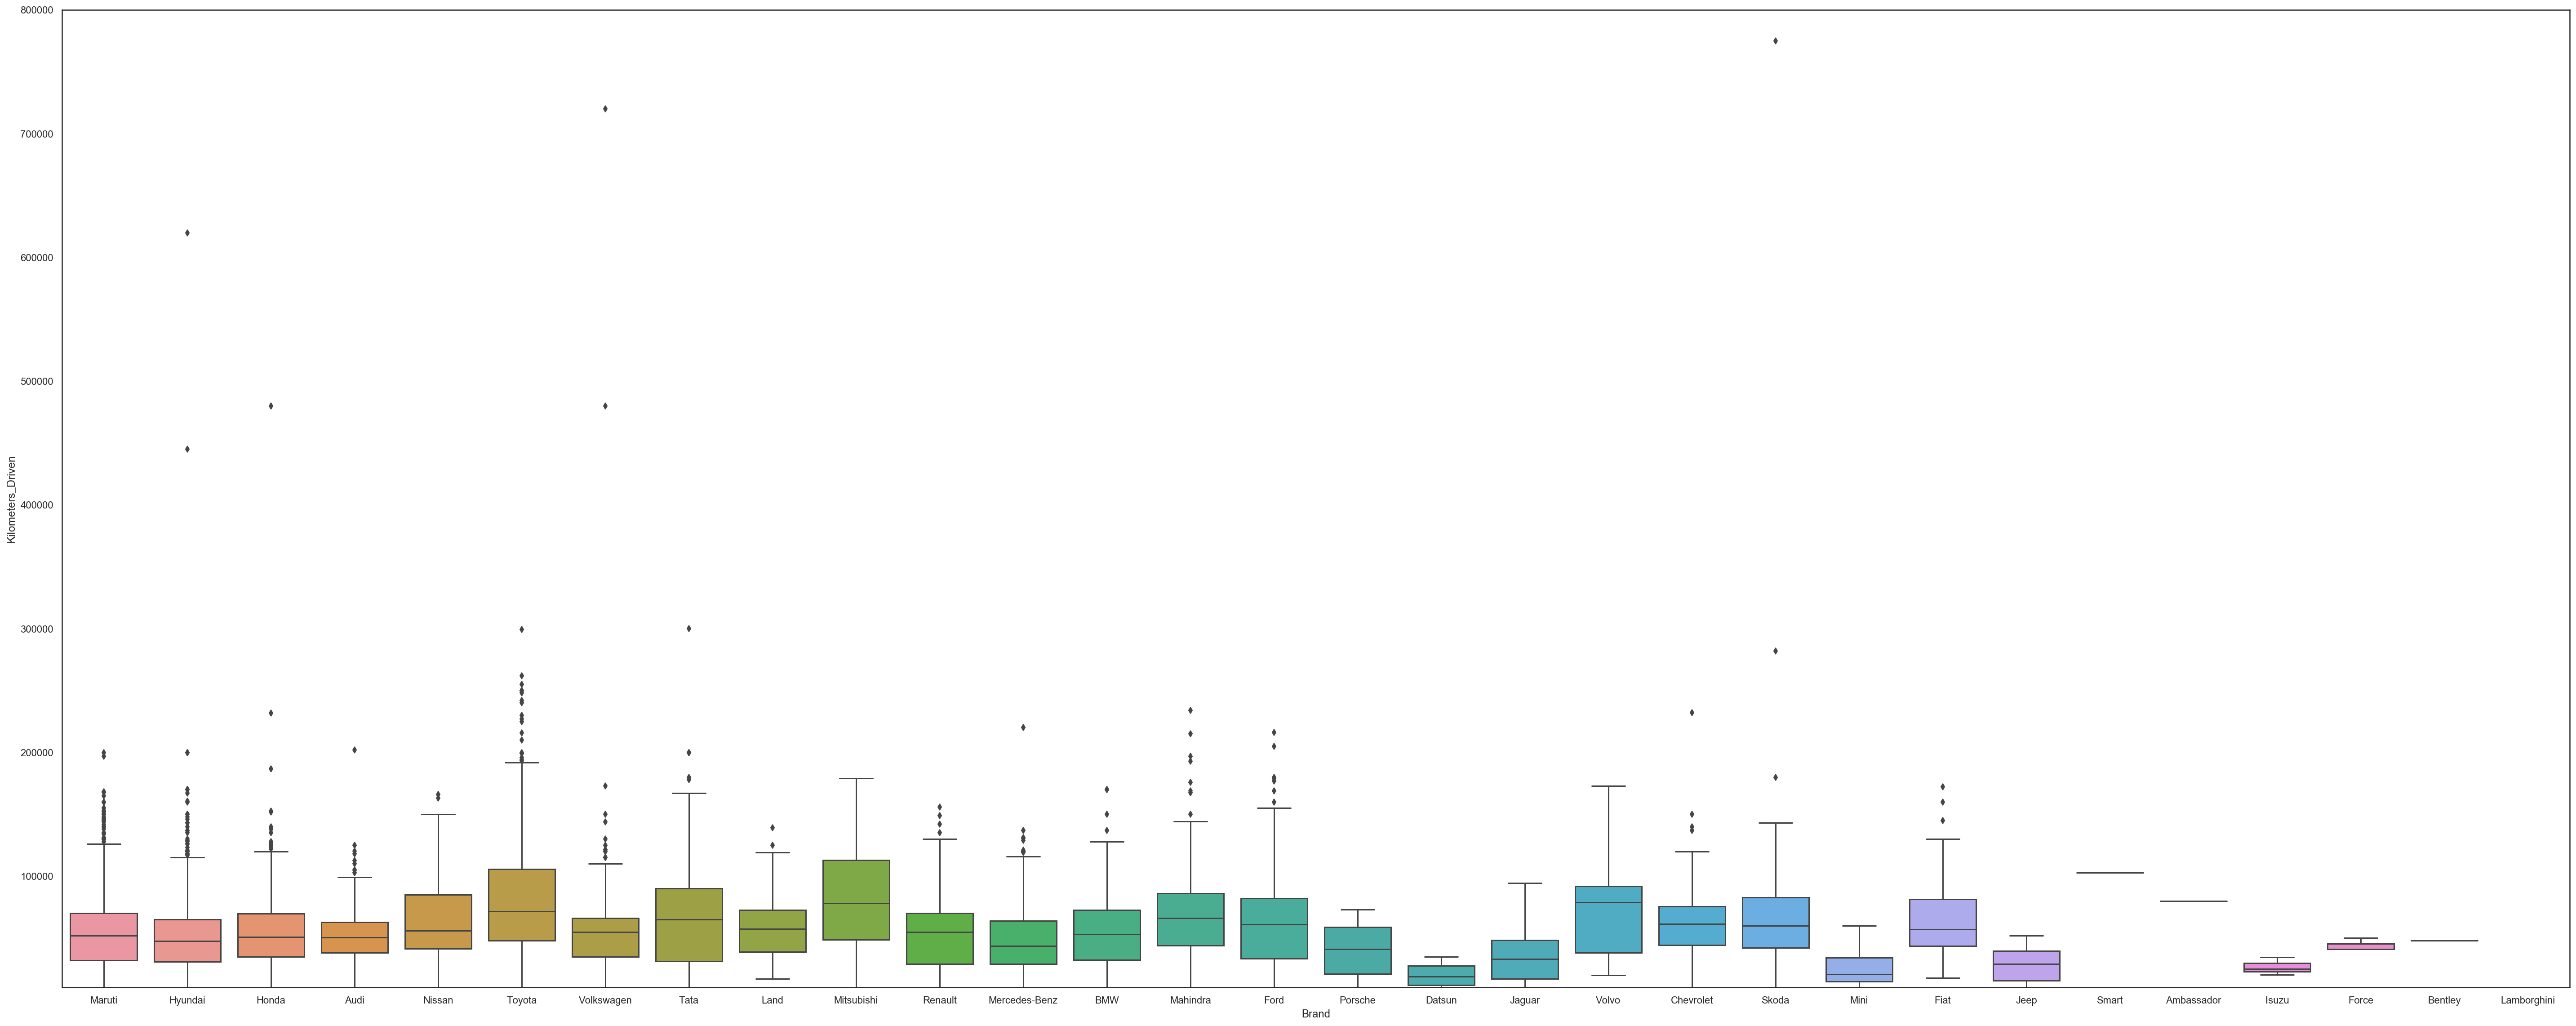

In [47]:
plt.figure(figsize=(50,20))
plt.axis([0, 5, 10000, 800000])
sns.boxplot(x='Brand', y='Kilometers_Driven', data=car_t_l)
plt.show()

In [48]:
# Kilometers_Driven > 300000 이상치 제거
car_t_l_d = car_t_l.drop(car_t_l[car_t_l['Kilometers_Driven'] > 300000].index)
car_t_l_d.reset_index(drop=True, inplace=True)
# 성능 하락 
x = car_t_l_d.drop(['Name','Location','New_Price','Brand','Car_name','Price','Eng'], axis=1)
y = car_t_l_d['Price']

get_results(x, y)

explained_variance_score: 0.602785164478076
mean_squared_errors: 37.36087788743943
r2_score: 0.6021625059110732


In [49]:
# Kilometers_Driven > 800000 이상치 제거
car_t_l_d2 = car_t_l.drop(car_t_l[car_t_l['Kilometers_Driven'] > 800000].index)
car_t_l_d2.reset_index(drop=True, inplace=True)
# 성능 상승
x = car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price','Eng'], axis=1)
y = car_t_l_d2['Price']

get_results(x, y)

explained_variance_score: 0.7477021106296295
mean_squared_errors: 24.81061500155913
r2_score: 0.7476273076704452


In [50]:
# Kilometers_Driven > 800000 이상치 제거
car_t_l_d2 = car_t_l.drop(car_t_l[car_t_l['Kilometers_Driven'] > 800000].index)
car_t_l_d2.reset_index(drop=True, inplace=True)
# 성능 상승, 엔진을 제거하지 않는 것이 성능 상승
x = car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1)
y = car_t_l_d2['Price']

get_results(x, y)

explained_variance_score: 0.7479107186412299
mean_squared_errors: 24.7796326087648
r2_score: 0.74784091880406


## 7. MinMaxScaler

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mm = MinMaxScaler()

In [53]:
y = car_t_l_d2[['Price']]
y.shape

(6016, 1)

In [54]:
x = mm.fit_transform(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

get_results(x, y)

explained_variance_score: 0.7479107186411789
mean_squared_errors: 0.0009733001892380211
r2_score: 0.7478409188040085


## 8. PCA

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=1)

x = mm.fit_transform(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

principals = pca.fit_transform(x)

principals_df = pd.DataFrame(data=principals,columns = ['principal_component'])

get_results(principals, y)

explained_variance_score: -0.9403691247574759
mean_squared_errors: 0.0030928548111846792
r2_score: -0.9409303277760268


In [57]:
principals_df

principal_component
0               -0.406096
1                0.195586
2               -0.861485
3                0.223488
4                1.197420
...                   ...
6011             0.218323
6012             0.189116
6013             0.411616
6014            -0.965691
6015             0.378051

[6016 rows x 1 columns]

In [58]:
principals_df['Price'] = y

In [59]:
principals_df

principal_component     Price
0               -0.406096  0.008210
1                0.195586  0.075583
2               -0.861485  0.025445
3                0.223488  0.034846
4                1.197420  0.108423
...                   ...       ...
6011             0.218323  0.027012
6012             0.189116  0.022311
6013             0.411616  0.015417
6014            -0.965691  0.013851
6015             0.378051  0.012911

[6016 rows x 2 columns]

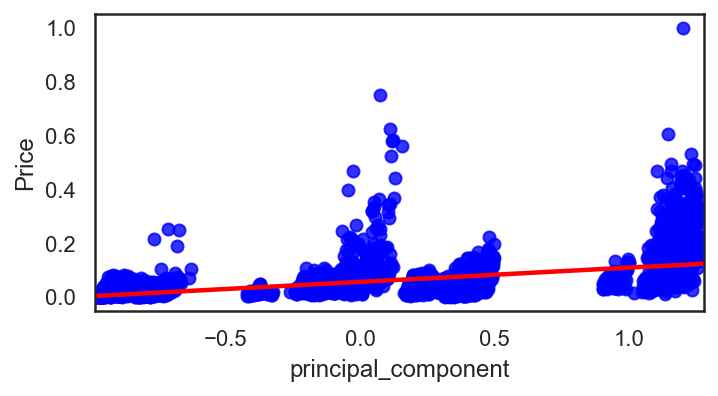

In [60]:
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x='principal_component', y='Price', data=principals_df, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

In [61]:
pca = PCA(n_components=2)

x = mm.fit_transform(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

principals = pca.fit_transform(x)

principals_df = pd.DataFrame(data=principals,columns = ['principal_component', 'principal_component2'])

get_results(principals, y)

explained_variance_score: -0.16867573705724093
mean_squared_errors: 0.002529540021698415
r2_score: -0.16867598898924063


In [62]:
principals_df['Price'] = y

In [63]:
principals_df

principal_component  principal_component2     Price
0               -0.406096             -0.355229  0.008210
1                0.195586             -0.663160  0.075583
2               -0.861485              0.141019  0.025445
3                0.223488             -0.831791  0.034846
4                1.197420              0.568273  0.108423
...                   ...                   ...       ...
6011             0.218323             -0.803218  0.027012
6012             0.189116             -0.716615  0.022311
6013             0.411616             -0.771652  0.015417
6014            -0.965691             -0.064302  0.013851
6015             0.378051             -0.755472  0.012911

[6016 rows x 3 columns]

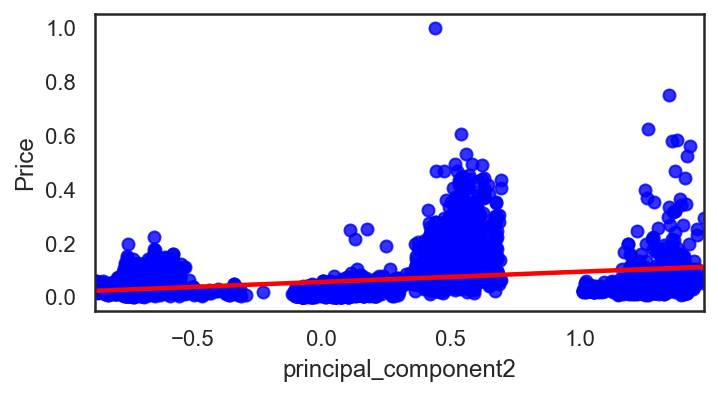

In [64]:
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x='principal_component2', y='Price', data=principals_df, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

## 9. 교차 검증

In [65]:
from sklearn.model_selection import KFold

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [67]:
x = mm.fit_transform(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

In [68]:
skf = StratifiedKFold(n_splits=5)

In [69]:
kf = KFold(n_splits=5)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(x_train, y_train)

pred_test = reg.predict(x_test)

print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
print('r2_score: {}'.format(r2_score(pred_test, y_test)))

explained_variance_score: 0.7479107186411789
mean_squared_errors: 0.0009733001892380211
r2_score: 0.7478409188040085


In [71]:
cross_validate(reg, x, y, cv=kf)

{'fit_time': array([0.01336479, 0.01086402, 0.01287103, 0.01034307, 0.00964618]),
 'score_time': array([0.00072122, 0.00068402, 0.00071907, 0.00059485, 0.00057292]),
 'test_score': array([0.78115592, 0.76220946, 0.78298467, 0.71557769, 0.79112055])}

In [72]:
# 모델의 평가 0.77
score = cross_val_score(reg, x, y, cv=kf)
score.mean()

0.7666096570153279

## 10. 계산

In [73]:
# pp = reg.predict(a[[-1]]) * 100000 * 15

In [74]:
xx = mm.fit(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
x = xx.transform(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
yy = mm.fit(car_t_l_d2[['Price']])
y = yy.transform(car_t_l_d2[['Price']])

get_results(x, y)

explained_variance_score: 0.7479107186411789
mean_squared_errors: 0.0009733001892380211
r2_score: 0.7478409188040085


In [104]:
def get_used_car_price(car):
    xx = mm.fit(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
    x = xx.transform(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))

    m = xx.transform(pd.DataFrame(car))
    m_m = reg.predict(m)
    yy = mm.fit(car_t_l_d2[['Price']])
    return(yy.inverse_transform(m_m))

In [76]:
pcar = np.array([[2013, 120000, 5, 10, 1995, 180,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0]])

In [77]:
hyun = np.array([[2014, 43000, 5, 18.9, 1197, 81,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0]])

In [105]:
get_used_car_price(hyun)

array([[3.50797337]])

In [78]:
pd.DataFrame(pcar)

0       1   2   3     4    5   6   7   8   9   10  11  12  13  14  15  \
0  2013  120000   5  10  1995  180   0   0   0   0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  
0   0   0   1   0   0   1   0   3   0   0   0   0   0   0   0   0   0   0   0

In [79]:
xx = mm.fit(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))

In [80]:
pcar_m = xx.transform(pd.DataFrame(pcar))

In [81]:
hyun_m = xx.transform(pd.DataFrame(hyun))

In [82]:
pcar_m_m = reg.predict(pcar_m)

In [83]:
hyun_m_m = reg.predict(hyun_m)

In [84]:
yy = mm.fit(car_t_l_d2[['Price']])

In [85]:
yy.inverse_transform(pcar_m_m)*100000*15

array([[19087395.25561731]])

In [86]:
yy.inverse_transform(hyun_m_m)

array([[3.50797337]])

In [87]:
car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1).head()

Year  Kilometers_Driven  Seats    Mile     Eng     Pow  Ambassador  \
0     2010              72000      5  43.624   998.0   58.16           0   
1     2015              41000      5  19.670  1582.0  126.20           0   
2     2011              46000      5  18.200  1199.0   88.70           0   
3     2012              87000      7  20.770  1248.0   88.76           0   
4     2013              40670      5  15.200  1968.0  140.80           0   
...    ...                ...    ...     ...     ...     ...         ...   
6011  2014              27365      5  28.400  1248.0   74.00           0   
6012  2015             100000      5  24.400  1120.0   71.00           0   
6013  2012              55000      8  14.000  2498.0  112.00           0   
6014  2013              46000      5  18.900   998.0   67.10           0   
6015  2011              47000      5  25.440   936.0   57.60           0   

      Audi  BMW  Bentley  Chevrolet  Datsun  Fiat  Force  Ford  Honda  \
0        0    0        0          0       0     0      0     0      0   
1        0    0        0          0       0     0      0     0      0   
2        0    0        0          0       0     0      0     0      1   
3        0    0        0          0       0     0      0     0      0   
4        1    0        0          0       0     0      0     0      0   
...    ...  ...      ...        ...     ...   ...    ...   ...    ...   
6011     0    0        0          0       0     0      0     0      0   
6012     0    0        0          0       0     0      0     0      0   
6013     0    0        0          0       0     0      0     0      0   
6014     0    0        0          0       0     0      0     0      0   
6015     0    0        0          1       0     0      0     0      0   

      Hyundai  Isuzu  Jaguar  Jeep  Lamborghini  Land  Mahindra  Maruti  \
0           0      0       0     0            0     0         0       1   
1           1      0       0     0            0     0         0       0   
2           0      0       0     0            0     0         0       0   
3           0      0       0     0            0     0         0       1   
4           0      0       0     0            0     0         0       0   
...       ...    ...     ...   ...          ...   ...       ...     ...   
6011        0      0       0     0            0     0         0       1   
6012        1      0       0     0            0     0         0       0   
6013        0      0       0     0            0     0         1       0   
6014        0      0       0     0            0     0         0       1   
6015        0      0       0     0            0     0         0       0   

      Mercedes-Benz  Mini  Mitsubishi  Nissan  Porsche  Renault  Skoda  Smart  \
0                 0     0           0       0        0        0      0      0   
1                 0     0           0       0        0        0      0      0   
2                 0     0           0       0        0        0      0      0   
3                 0     0           0       0        0        0      0      0   
4                 0     0           0       0        0        0      0      0   
...             ...   ...         ...     ...      ...      ...    ...    ...   
6011              0     0           0       0        0        0      0      0   
6012              0     0           0       0        0        0      0      0   
6013              0     0           0       0        0        0      0      0   
6014              0     0           0       0        0        0      0      0   
6015              0     0           0       0        0        0      0      0   

      Tata  Toyota  Volkswagen  Volvo  CNG  Diesel  LPG  Petrol  Automatic  \
0        0       0           0      0    1       0    0       0          0   
1        0       0           0      0    0       1    0       0          0   
2        0       0           0      0    0       0    0       1          0   
3        0       0           0

## 11. 그래프

In [88]:
x = mm.fit_transform(car_t_l_d2.drop(['Name','Location','New_Price','Brand','Car_name','Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

In [89]:
x_ls = []

In [90]:
y_ls = []

In [91]:
for i in range(0,6016):
    x_ls.append(x[i][2])

In [92]:
for i in range(0,6016):
    y_ls.append(y[i])

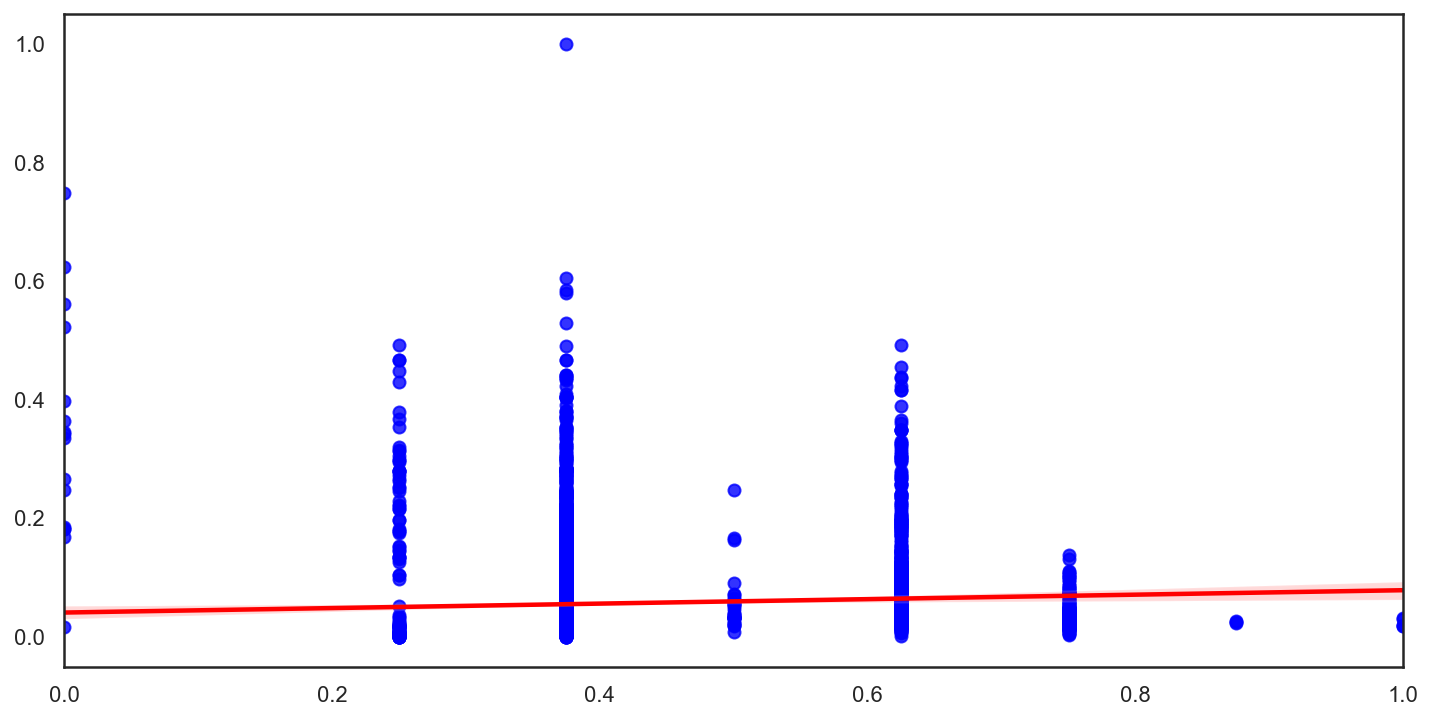

In [93]:
plt.figure(figsize=(12,6))

sns.regplot(x=x_ls, y=y_ls, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

0


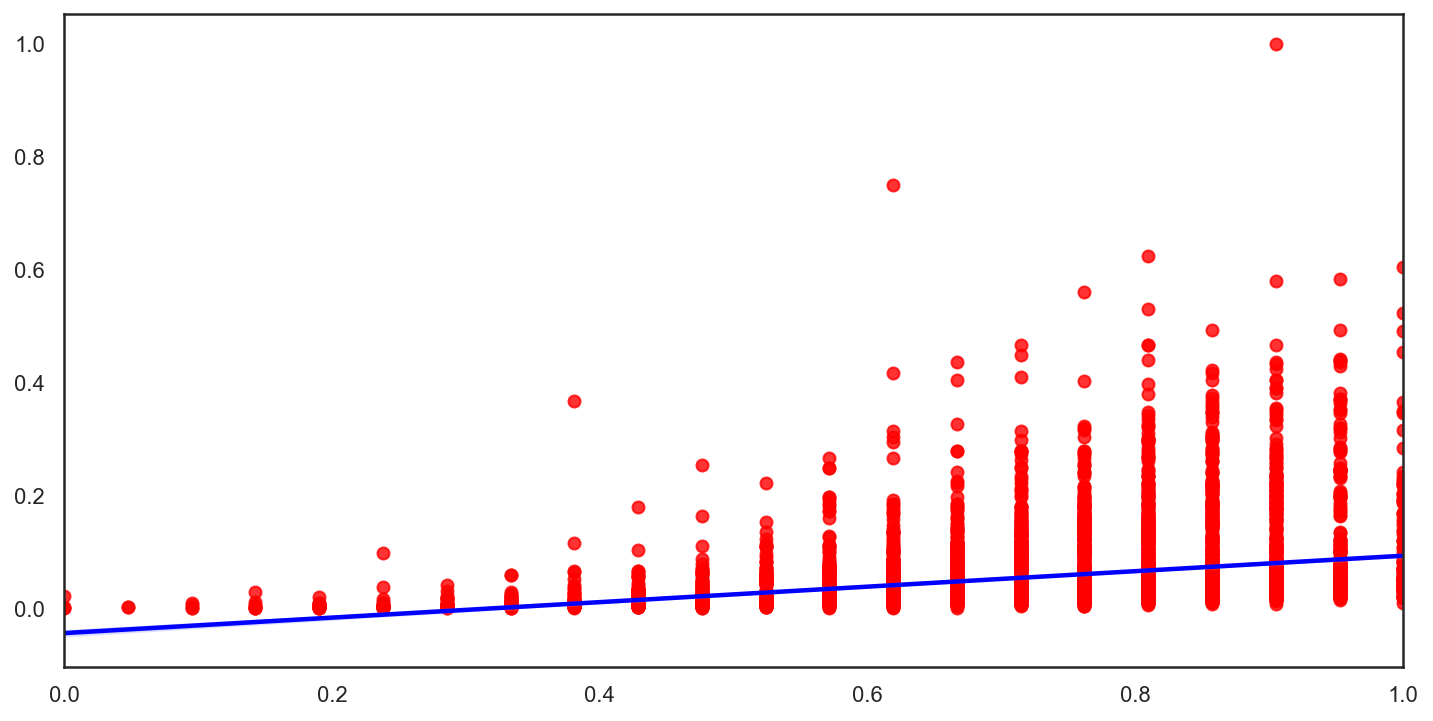

1


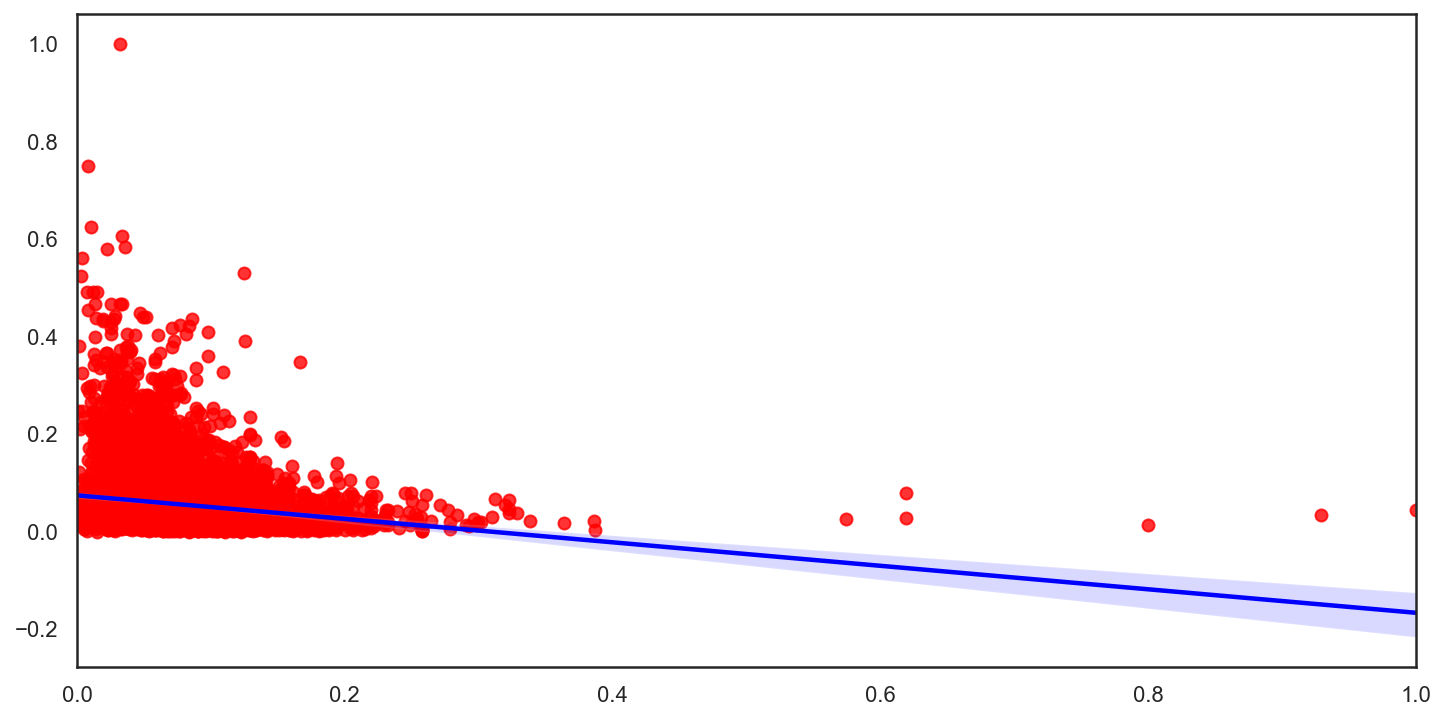

2


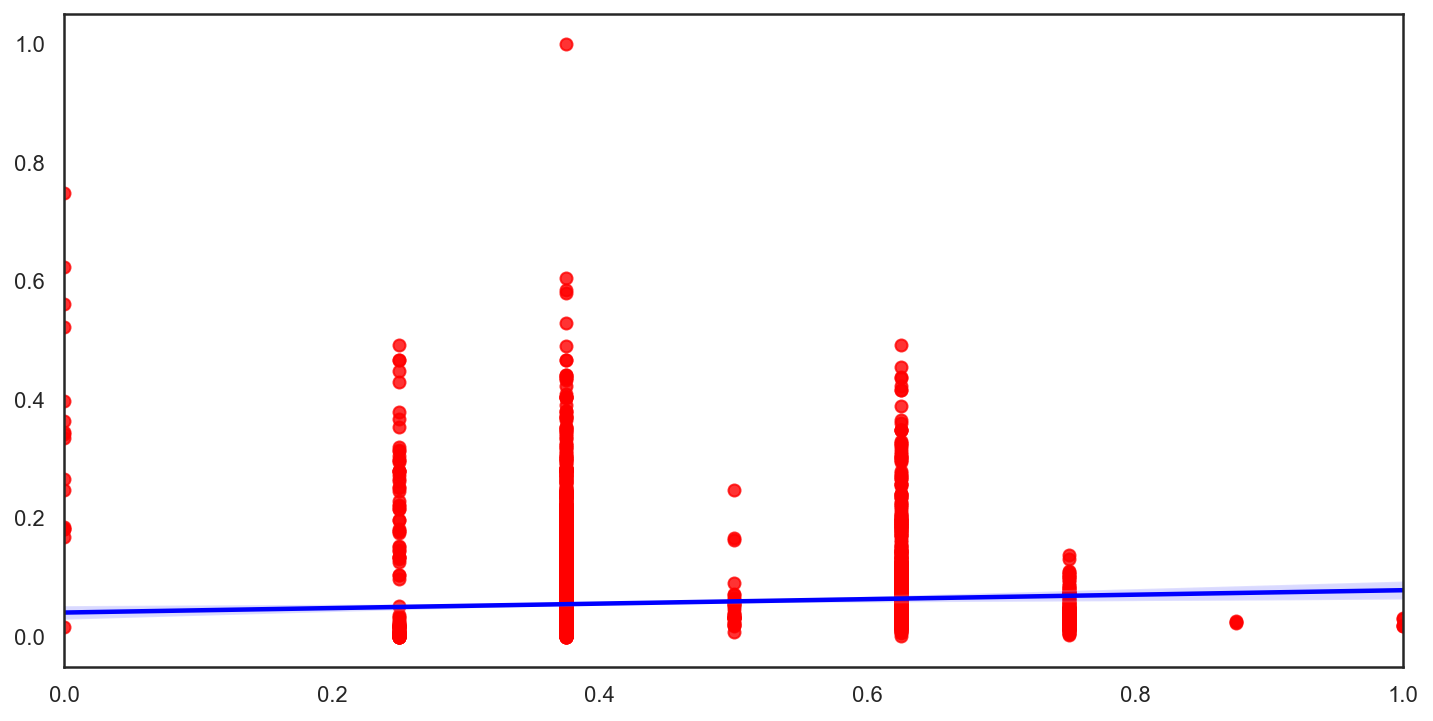

3


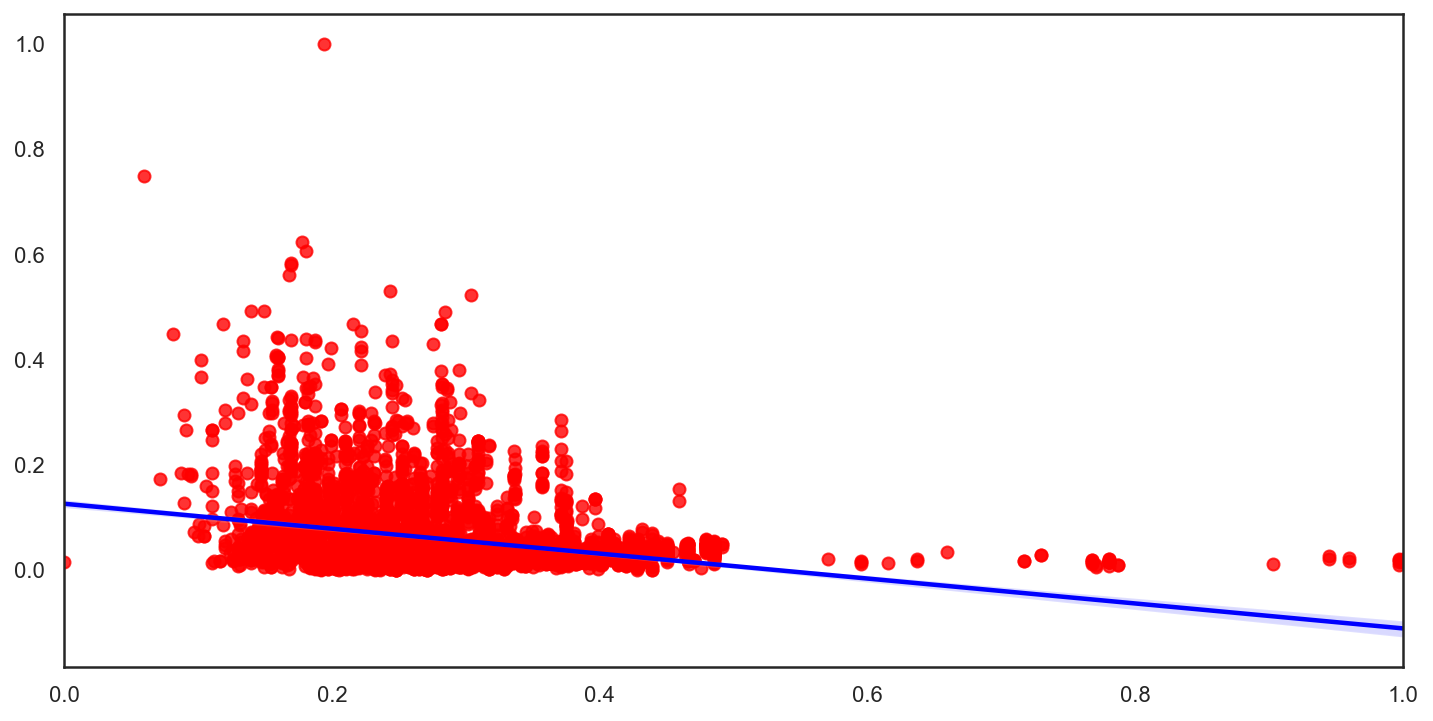

4


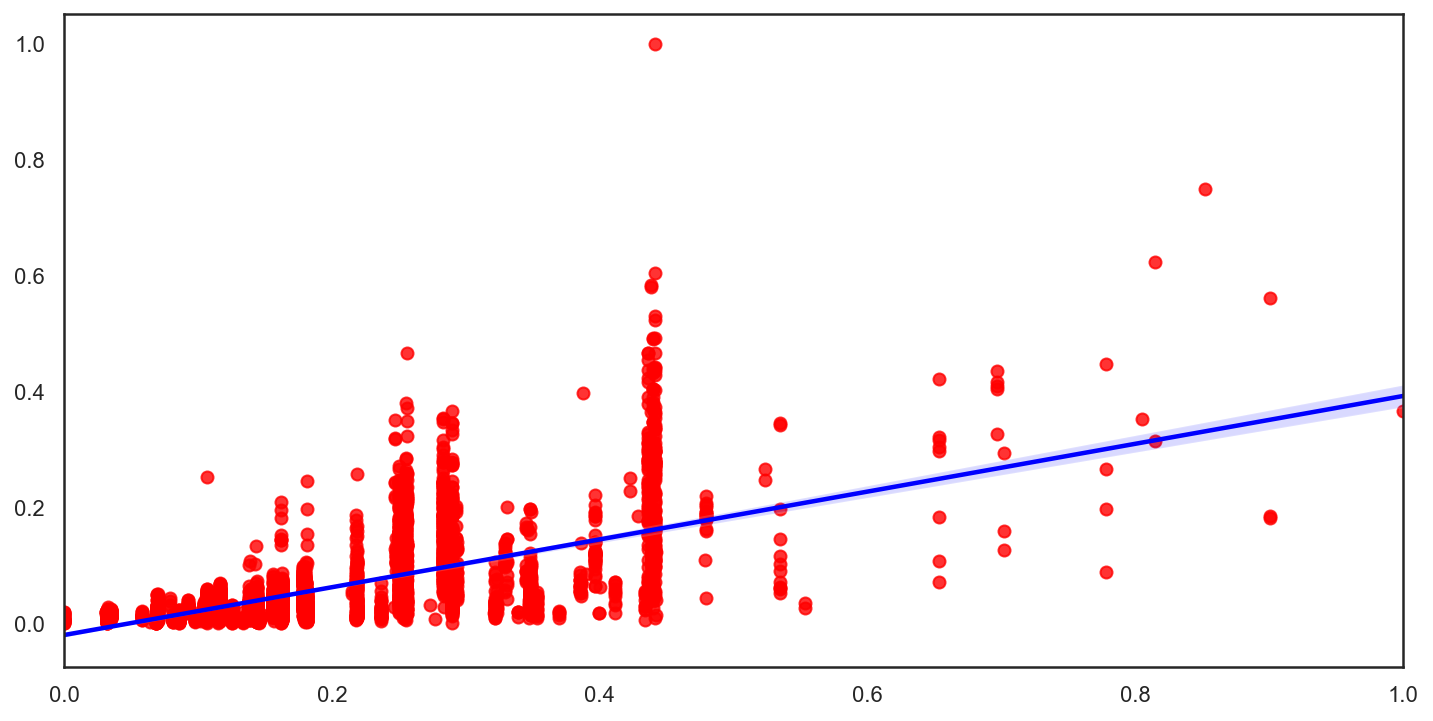

5


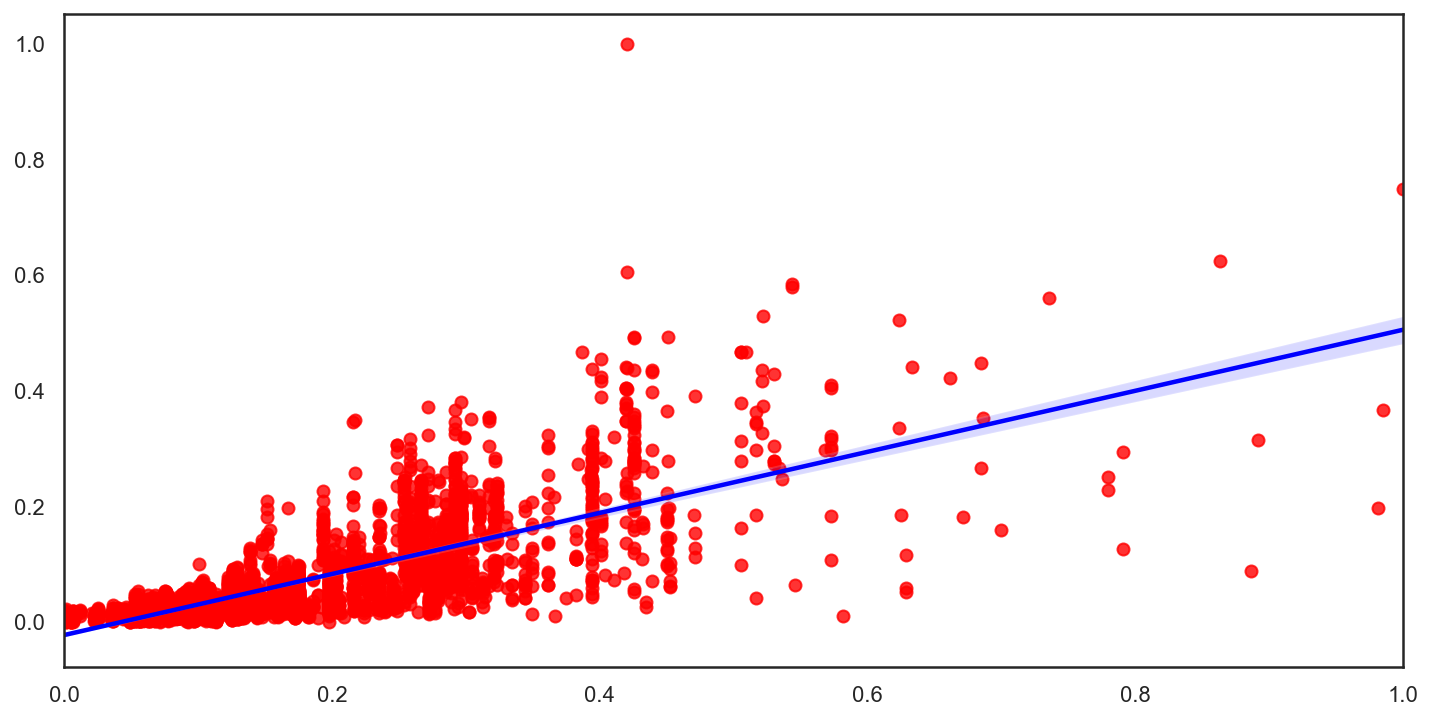

In [111]:
for k in range(0,6):
    print(k)
    x_ls = []

    y_ls = []

    for i in range(0,6016):
        x_ls.append(x[i][k])

    for i in range(0,6016):
        y_ls.append(y[i])

    plt.figure(figsize=(12,6))
    sns.regplot(x=x_ls, y=y_ls, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
    plt.show()

## 앞으로
1. 새로운 컬럼
2. 모델 파라미터 조정

### 10% 확률로 new_price를 넣었을 때 모델 성능이 좋음

In [95]:
# def get_results2(x, y):

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#     reg = LinearRegression()
#     reg.fit(x_train, y_train)

#     pred_test = reg.predict(x_test)

    
#     return(mean_squared_error(pred_test, y_test))
   

In [96]:
# ls_1000 = []

In [97]:
# for _ in range(0,10000):
#     car_8s = car_t[car_t['New_Price'].isnull()].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Price','Name','Location','New_Price','Brand','Car_name'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

In [98]:
# ls_1000_pd = pd.DataFrame(ls_1000)

In [99]:
# len(ls_1000_pd)

In [100]:
# len(ls_1000_pd[ls_1000_pd[0]>=46])/100 

In [101]:
car_t[car_t['Brand'] == 'Bentley']

Name   Location  Year  Kilometers_Driven  \
5519  Bentley Continental Flying Spur  Hyderabad  2006              48000   

      Seats New_Price  Price    Brand                 Car_name  Mile     Eng  \
5519      4       NaN   59.0  Bentley  Continental Flying Spur   8.6  5998.0   

        Pow  Ambassador  Audi  BMW  Bentley  Chevrolet  Datsun  Fiat  Force  \
5519  552.0           0     0    0        1          0       0     0      0   

      Ford  Honda  Hyundai  Isuzu  Jaguar  Jeep  Lamborghini  Land  Mahindra  \
5519     0      0        0      0       0     0            0     0         0   

      Maruti  Mercedes-Benz  Mini  Mitsubishi  Nissan  Porsche  Renault  \
5519       0              0     0           0       0        0        0   

      Skoda  Smart  Tata  Toyota  Volkswagen  Volvo  CNG  Diesel  LPG  Petrol  \
5519      0      0     0       0           0      0    0       0    0       1   

      Automatic  Manual  Owner  
5519          1       0      1